<a href="https://colab.research.google.com/github/WattEfird4/Projects/blob/main/PGA_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###PREDICTING NUMBER OF WINS OVER 3 PGA SEASONS

###Data Dictionary

Player Name

Rounds	- # of rounds

Fairway Percentage

Year

Avg Distance	- average driving distance

gir	- greens in regulation

Average Putts

Average Scrambling

Average Score

Points

Wins

Top 10	- number of top 10s

Average SG Putts	- average strokes gained putting

Average SG Total	 - average total strokes gained

SG:OTT	 - strokes gained off the tee

SG:APR	 - strokes gained approached shot

SG:ARG	 - strokes gained around the green

Money - money won

In [140]:
import re
import sklearn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import seaborn as sns
from sklearn.model_selection import KFold, cross_validate

import xgboost as xgb
from sklearn import ensemble
from sklearn.ensemble import *
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.tree import *

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
%matplotlib inline
import seaborn as sns; sns.set() # for plot styling
from scipy import stats
plt.rcParams['figure.figsize']=[15,8]
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib
from sklearn.model_selection import RandomizedSearchCV
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from xgboost import XGBRegressor
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [142]:
tested = pd.read_csv('/content/drive/MyDrive/LinearRegression/pgaTourData.csv')

In [143]:
tested.shape

(2312, 18)

In [144]:
tested.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"


In [145]:
tested.isnull().sum()

,0
Player Name,0
Rounds,634
Fairway Percentage,634
Year,0
Avg Distance,634
gir,634
Average Putts,634
Average Scrambling,634
Average Score,634
Points,16


In [146]:
df = tested.copy()

In [147]:
(tested.isnull().sum()/len(tested)*100)

,0
Player Name,0.000000
Rounds,27.422145
Fairway Percentage,27.422145
Year,0.000000
Avg Distance,27.422145
gir,27.422145
Average Putts,27.422145
Average Scrambling,27.422145
Average Score,27.422145
Points,0.692042


In [148]:
df = tested.copy()

In [149]:
df.drop(['Player Name'],axis=1,inplace=True)


In [150]:
# Replace NaN values with 0 before converting to int
df['Wins'] = df['Wins'].fillna(0).astype(int)
# The inplace=True argument in replace is unnecessary as you are reassigning the column
# df['Wins'] = df['Wins'].replace('NaN', 0, inplace=True)

In [151]:
for column in df.columns:
  if df[column].dtype == 'numeric':
    df[column].fillna(df[column].mean(),inplace=True)
  else:
    df[column].fillna(df[column].mode()[0],inplace=True)

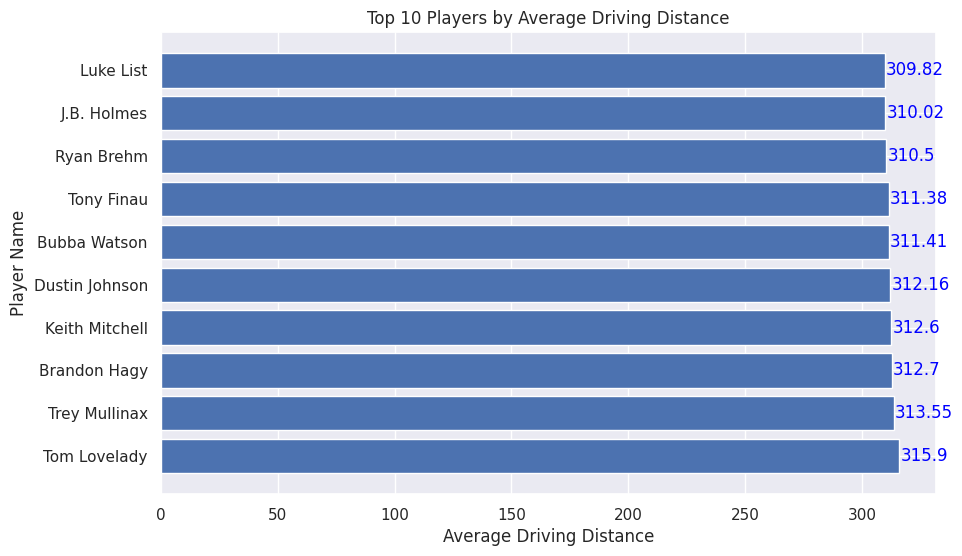

In [152]:
# prompt: plot a barh top 10 players in avg distance from tested dataframe show values for labels

import matplotlib.pyplot as plt

# Assuming 'tested' DataFrame is already loaded and processed as in your previous code.

# Calculate average distance for each player
avg_distance = tested.groupby('Player Name')['Avg Distance'].mean()

# Get the top 10 players
top_10_players = avg_distance.nlargest(10)

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_players.index, top_10_players.values)
plt.xlabel('Average Driving Distance')
plt.ylabel('Player Name')
plt.title('Top 10 Players by Average Driving Distance')

# Add value labels to the bars
for i, v in enumerate(top_10_players.values):
    plt.text(v + 0.5, i, str(round(v, 2)), color='blue', va='center') # Adjust 0.5 for better positioning

plt.show()


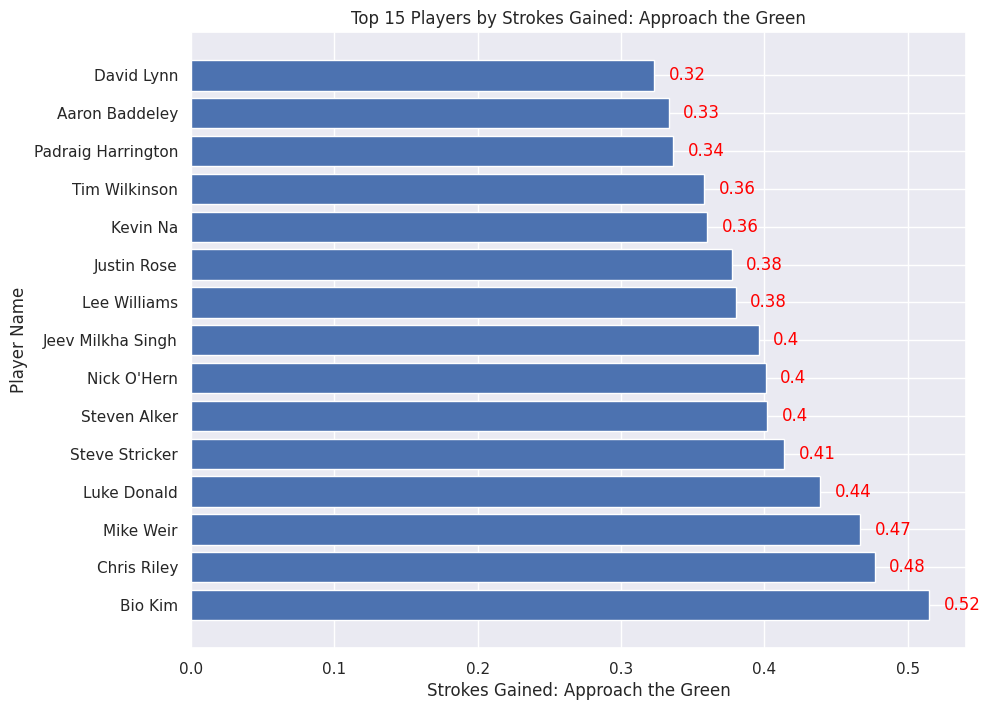

In [153]:
# prompt:  plot the top 15 players in SG ARG using tested dataframe

import matplotlib.pyplot as plt
# Assuming 'tested' DataFrame is already loaded and processed as in your previous code.

# Calculate SG_ARG for each player
sg_arg = tested.groupby('Player Name')['SG:ARG'].mean()

# Get the top 15 players
top_15_players = sg_arg.nlargest(15)

# Create the horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(top_15_players.index, top_15_players.values)
plt.xlabel('Strokes Gained: Approach the Green')
plt.ylabel('Player Name')
plt.title('Top 15 Players by Strokes Gained: Approach the Green')

# Add value labels to the bars
for i, v in enumerate(top_15_players.values):
    plt.text(v + 0.01, i, str(round(v, 2)), color='red', va='center') # Adjust 0.01 for better positioning

plt.show()


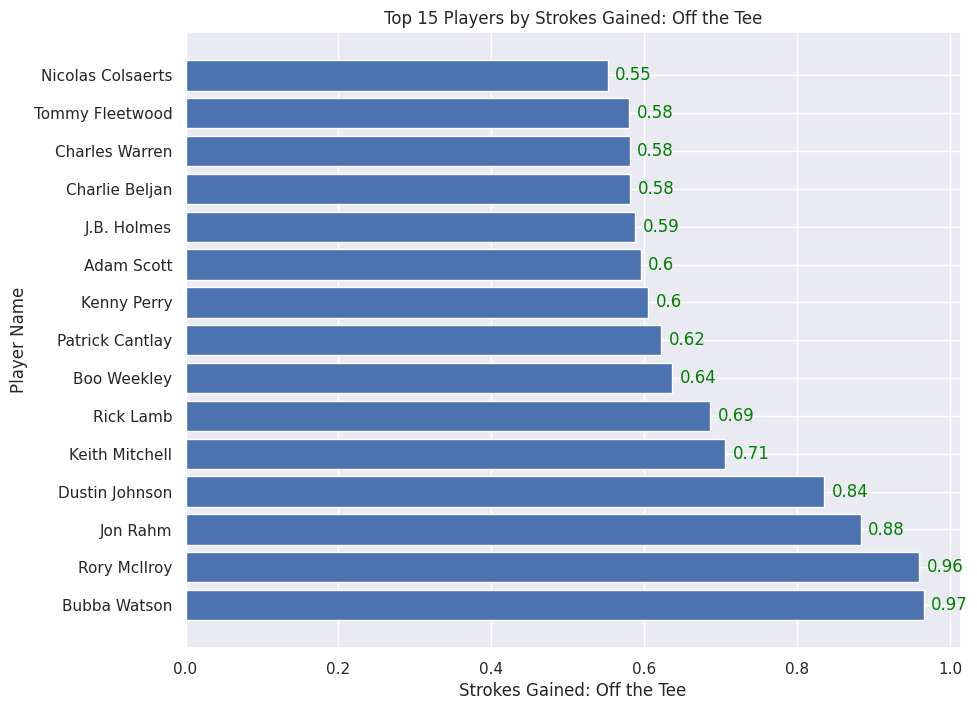

In [154]:
# prompt: plot the top 15 players for SG OTT using tested dataframe

import matplotlib.pyplot as plt
# Assuming 'tested' DataFrame is already loaded and processed as in your previous code.

# Calculate SG_OTT for each player
sg_ott = tested.groupby('Player Name')['SG:OTT'].mean()

# Get the top 15 players
top_15_players = sg_ott.nlargest(15)

# Create the horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(top_15_players.index, top_15_players.values)
plt.xlabel('Strokes Gained: Off the Tee')
plt.ylabel('Player Name')
plt.title('Top 15 Players by Strokes Gained: Off the Tee')

# Add value labels to the bars
for i, v in enumerate(top_15_players.values):
    plt.text(v + 0.01, i, str(round(v, 2)), color='green', va='center') # Adjust 0.01 for better positioning

plt.show()


In [155]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="sienna"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, color='red'
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

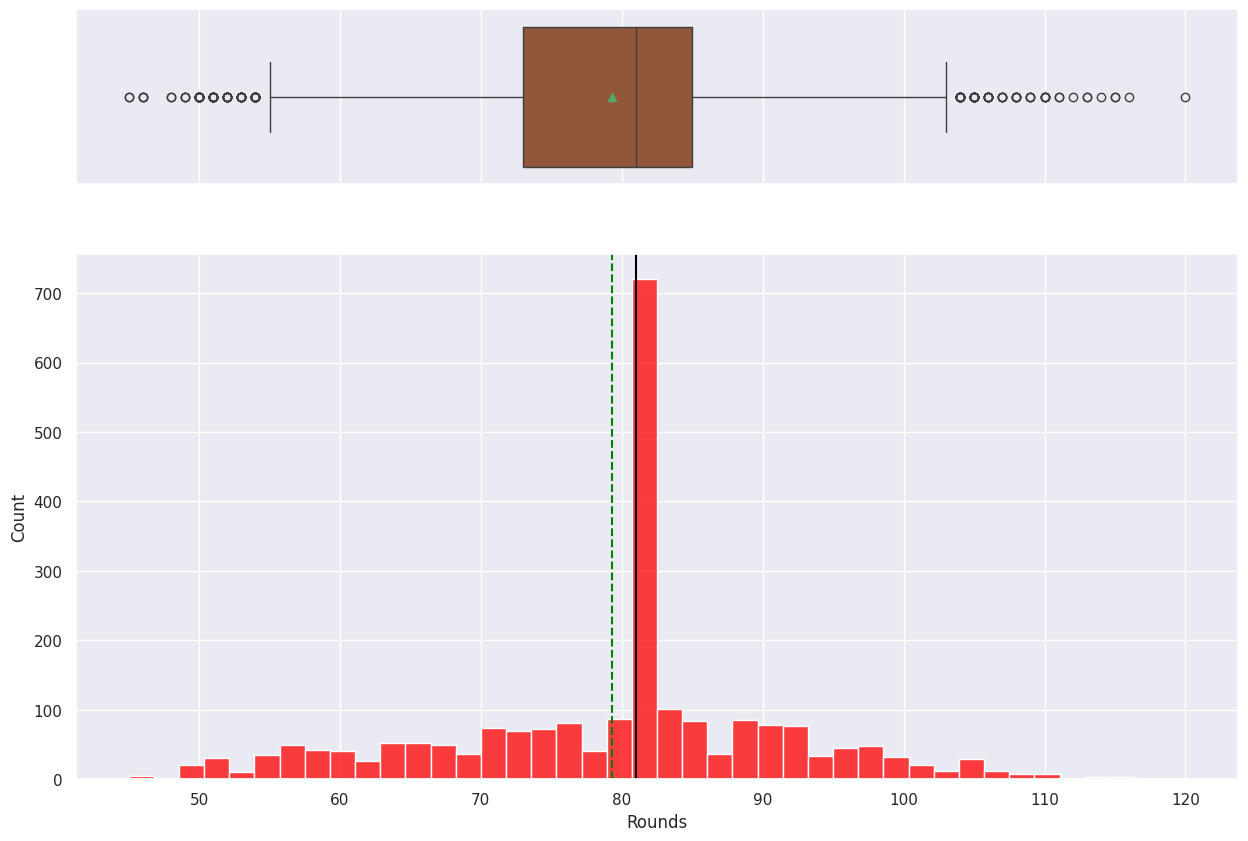

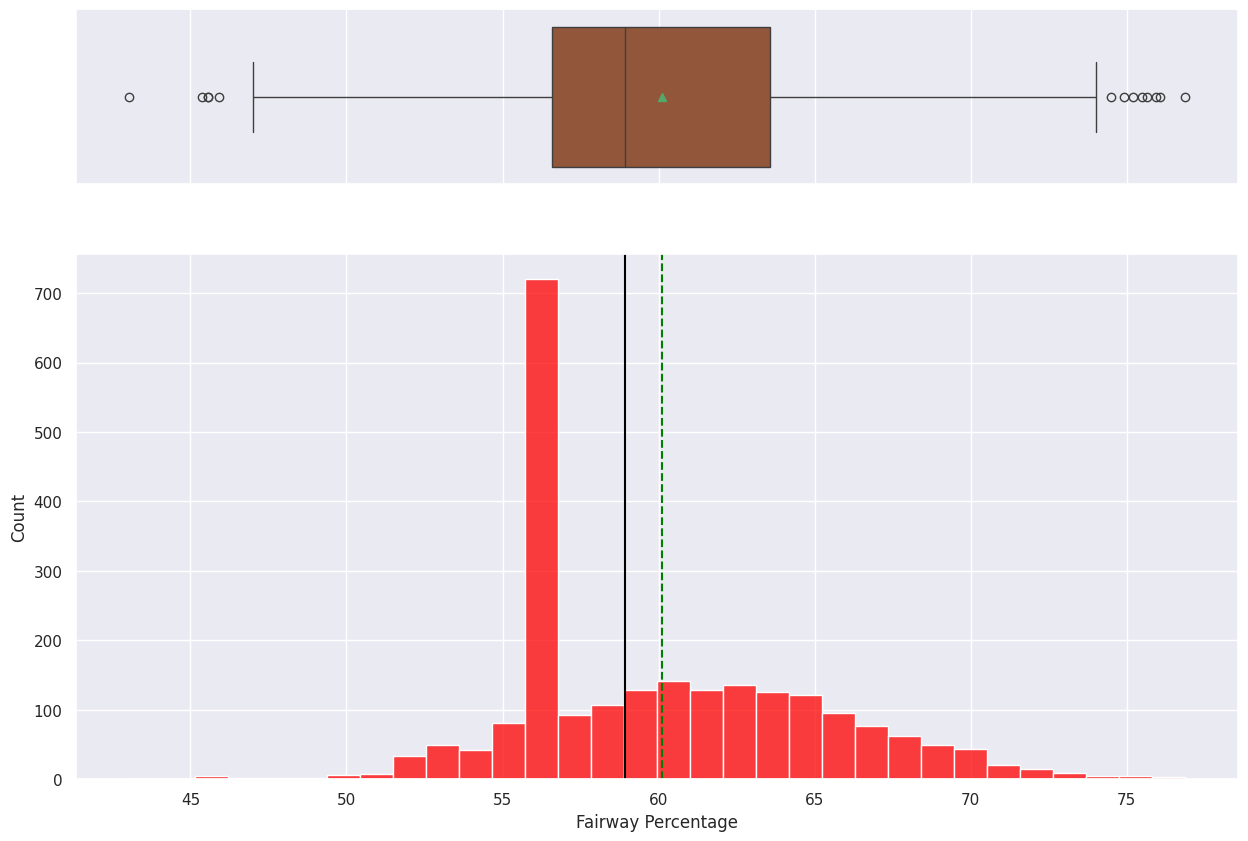

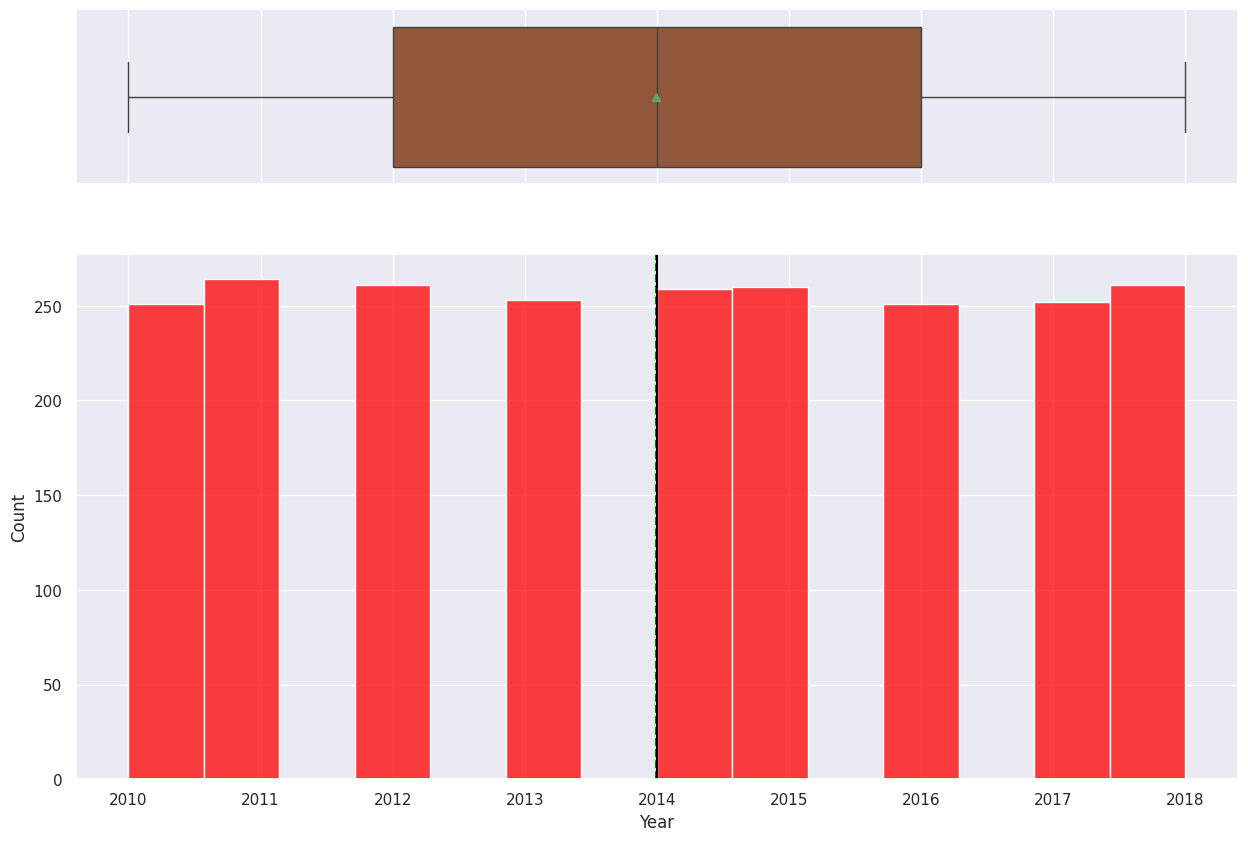

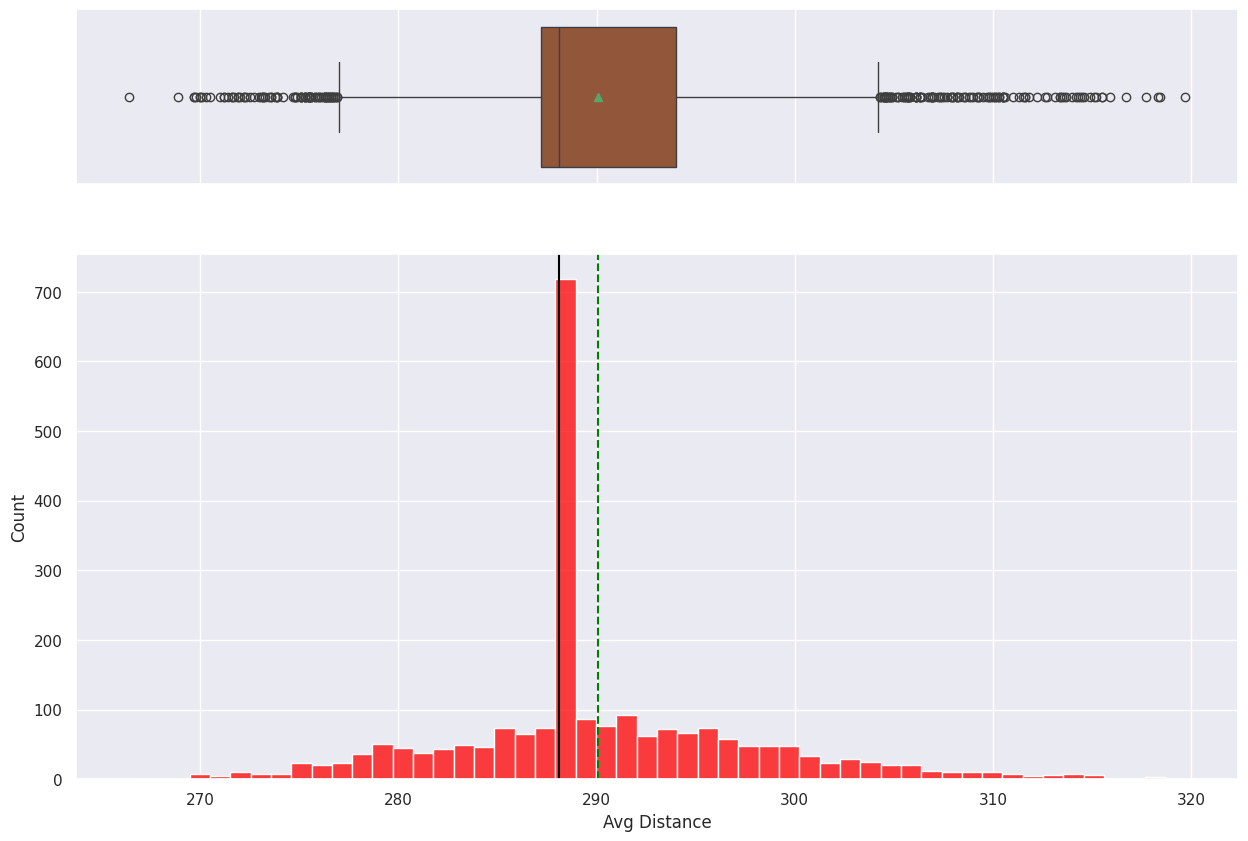

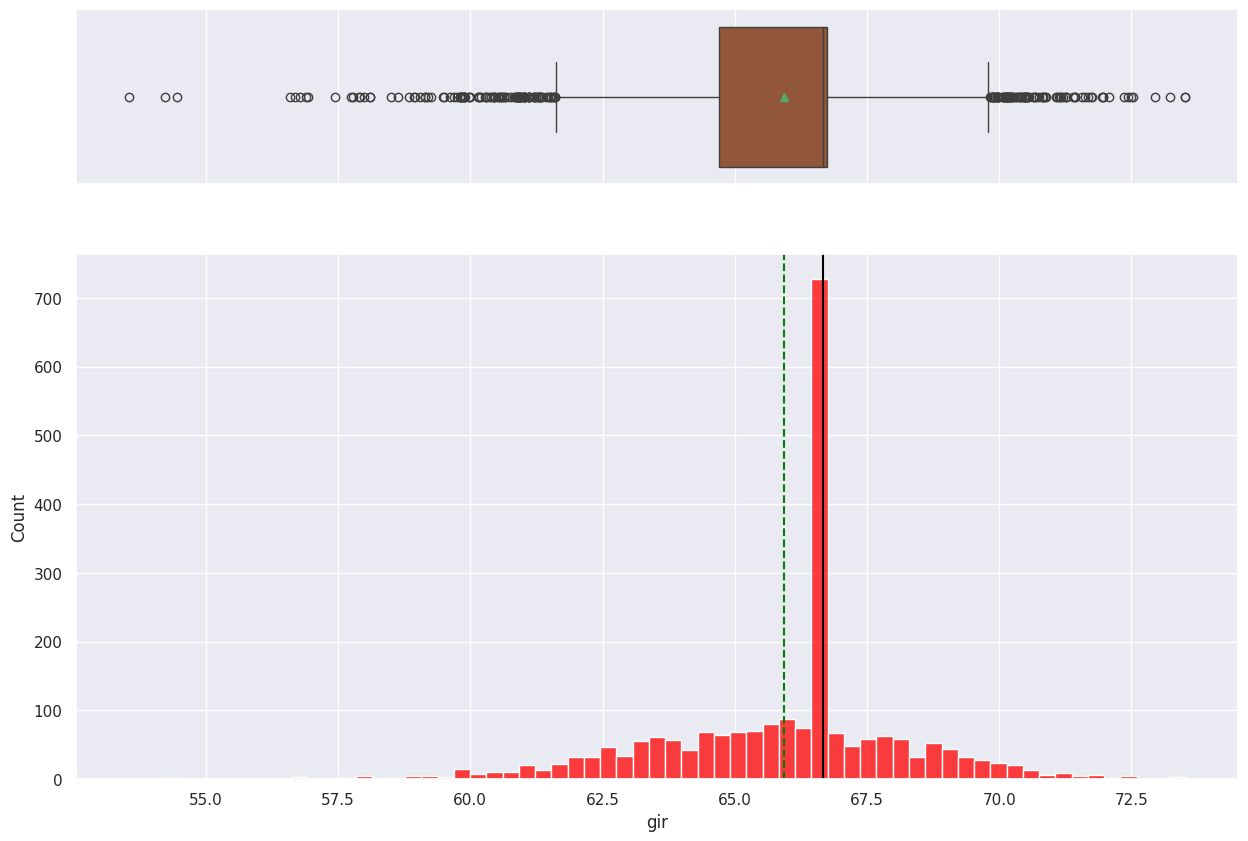

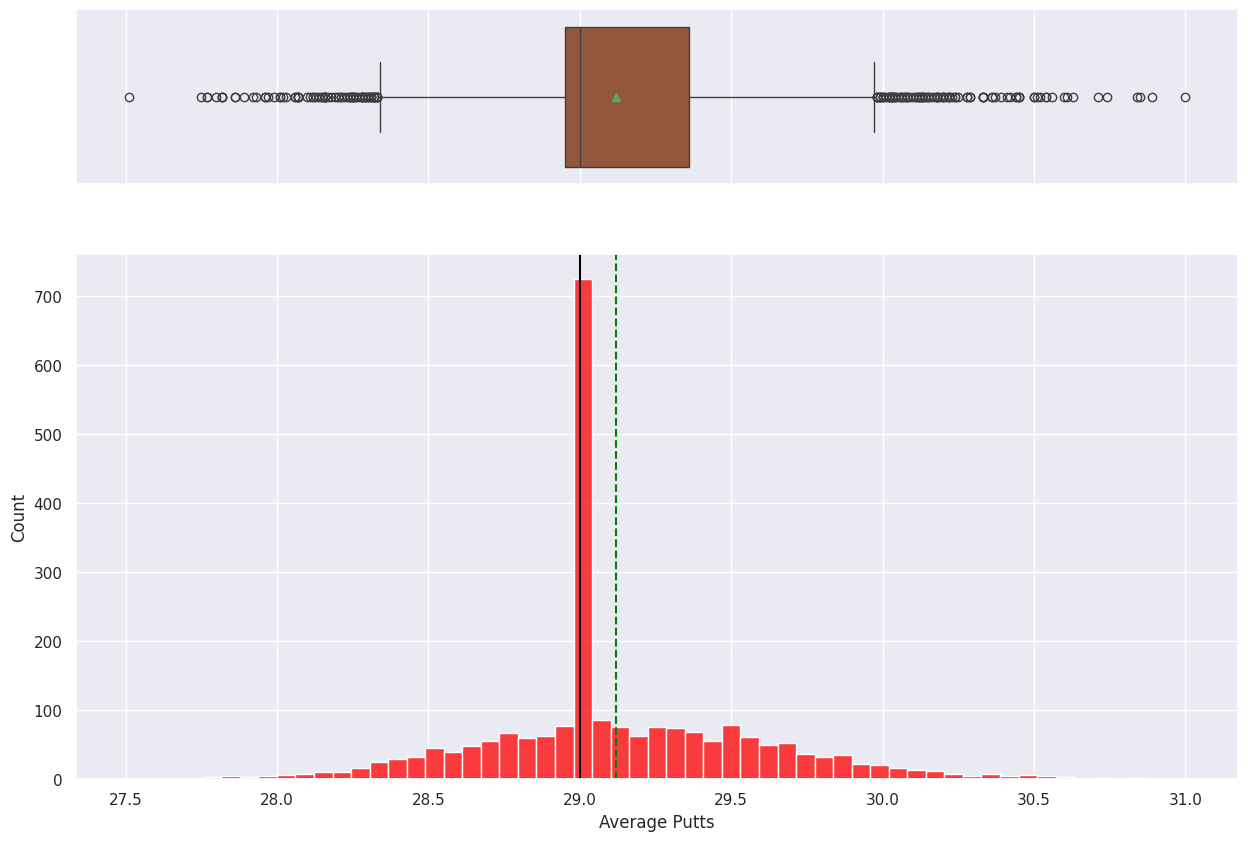

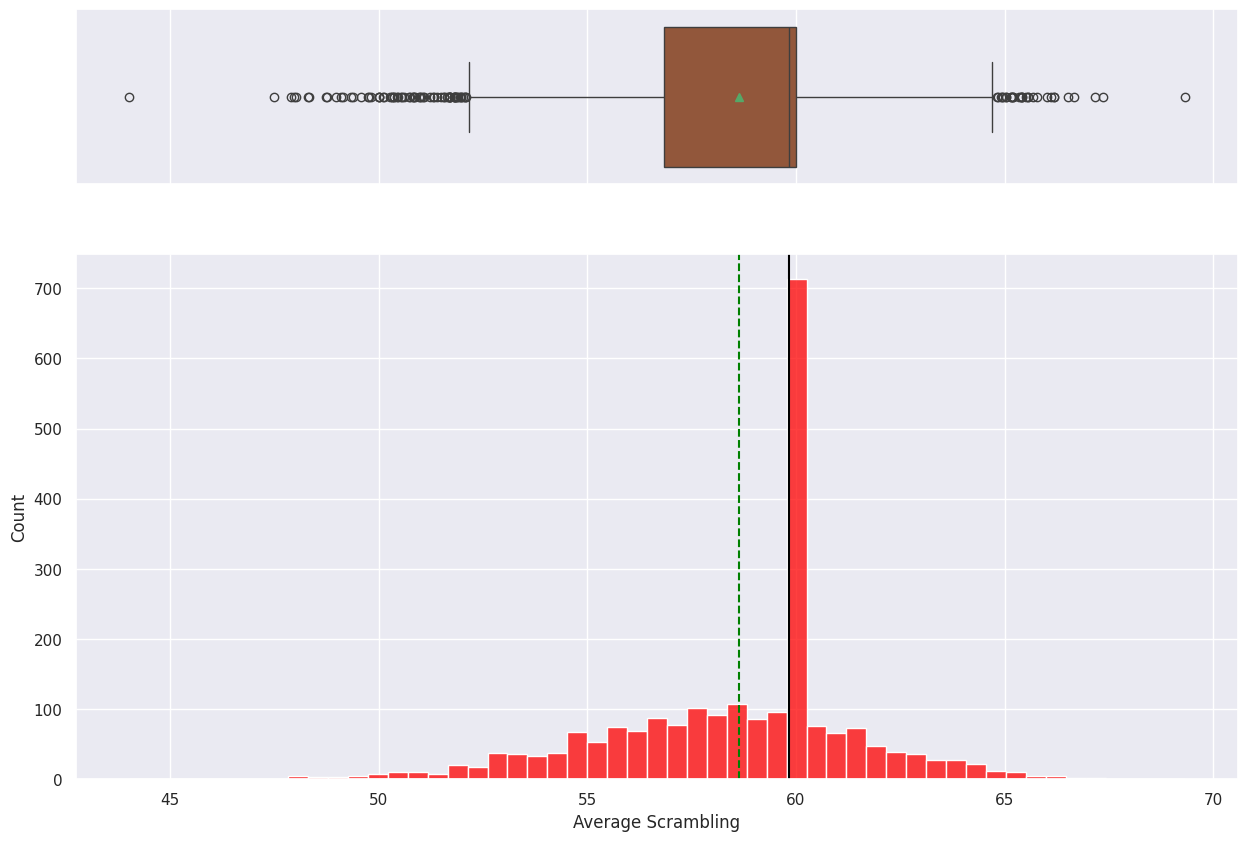

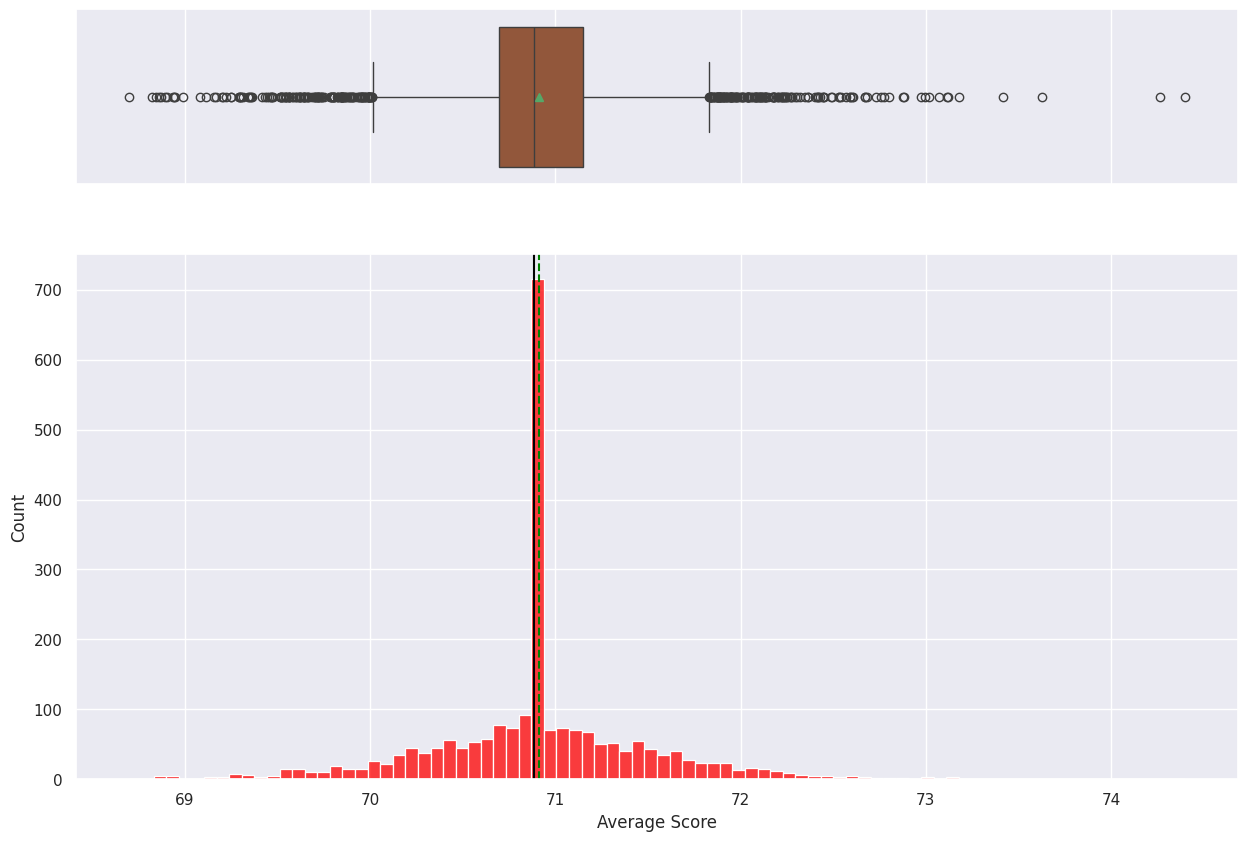

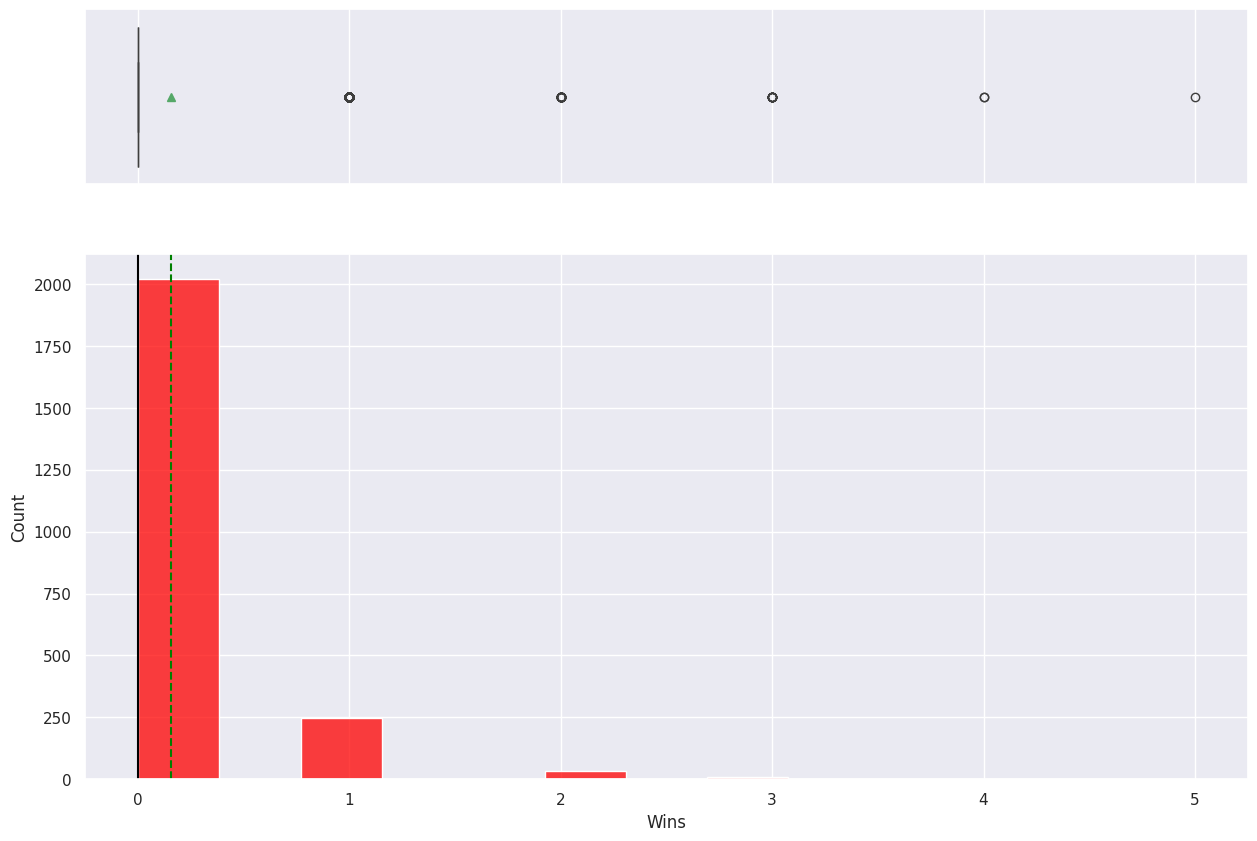

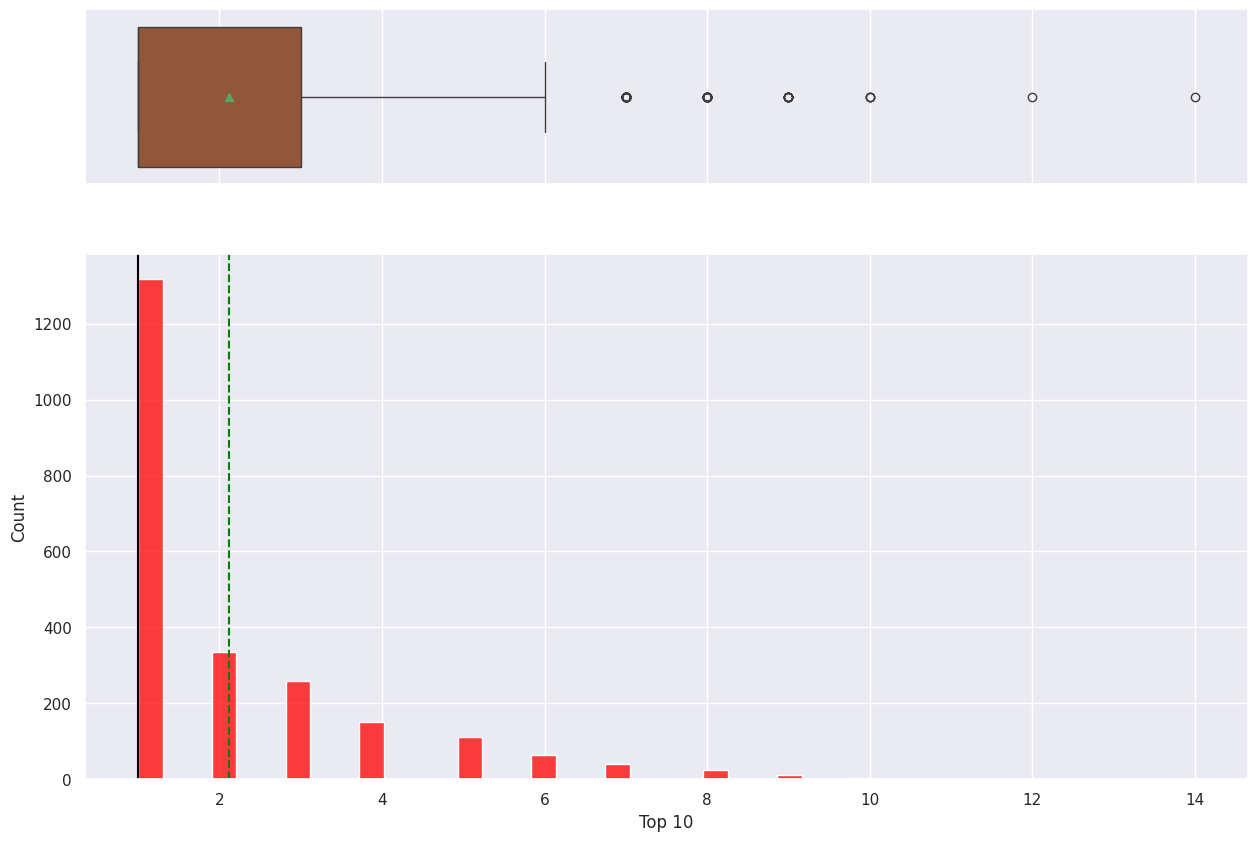

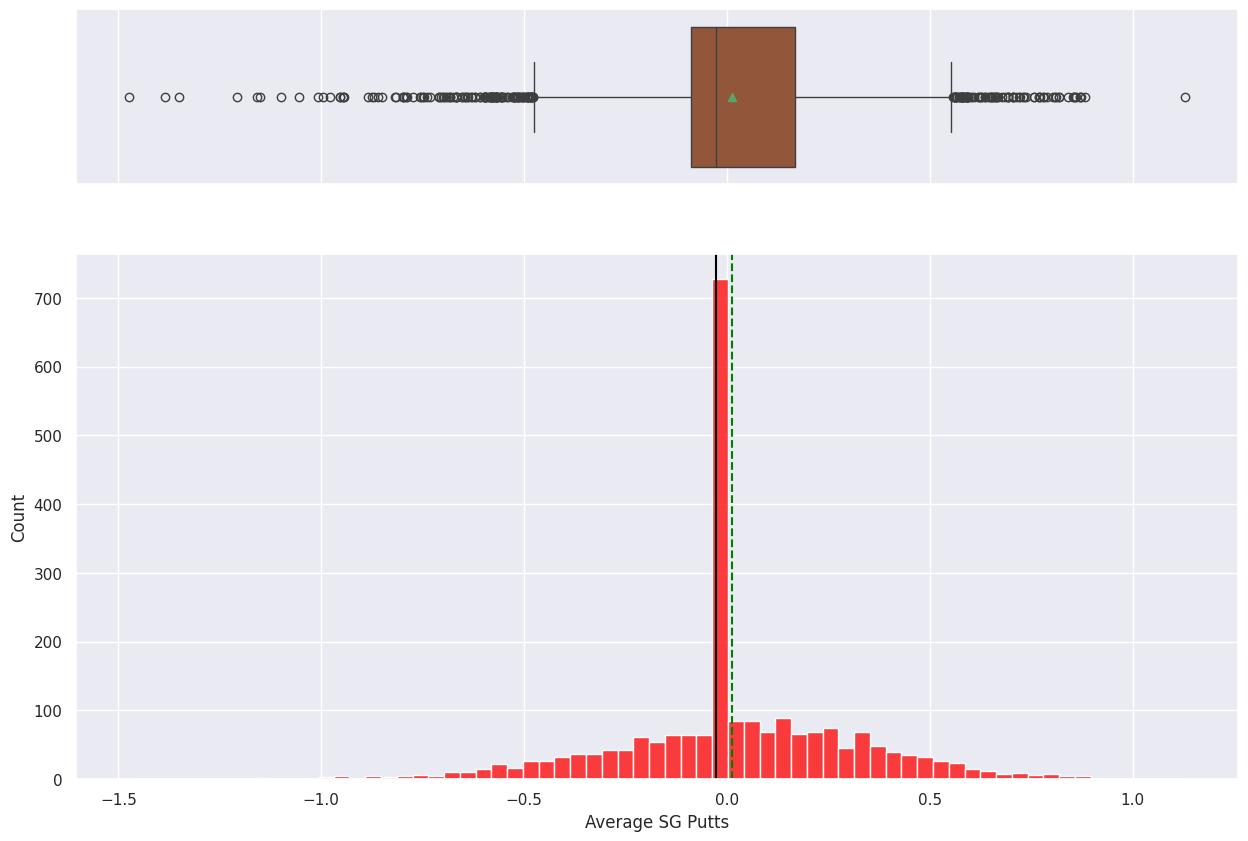

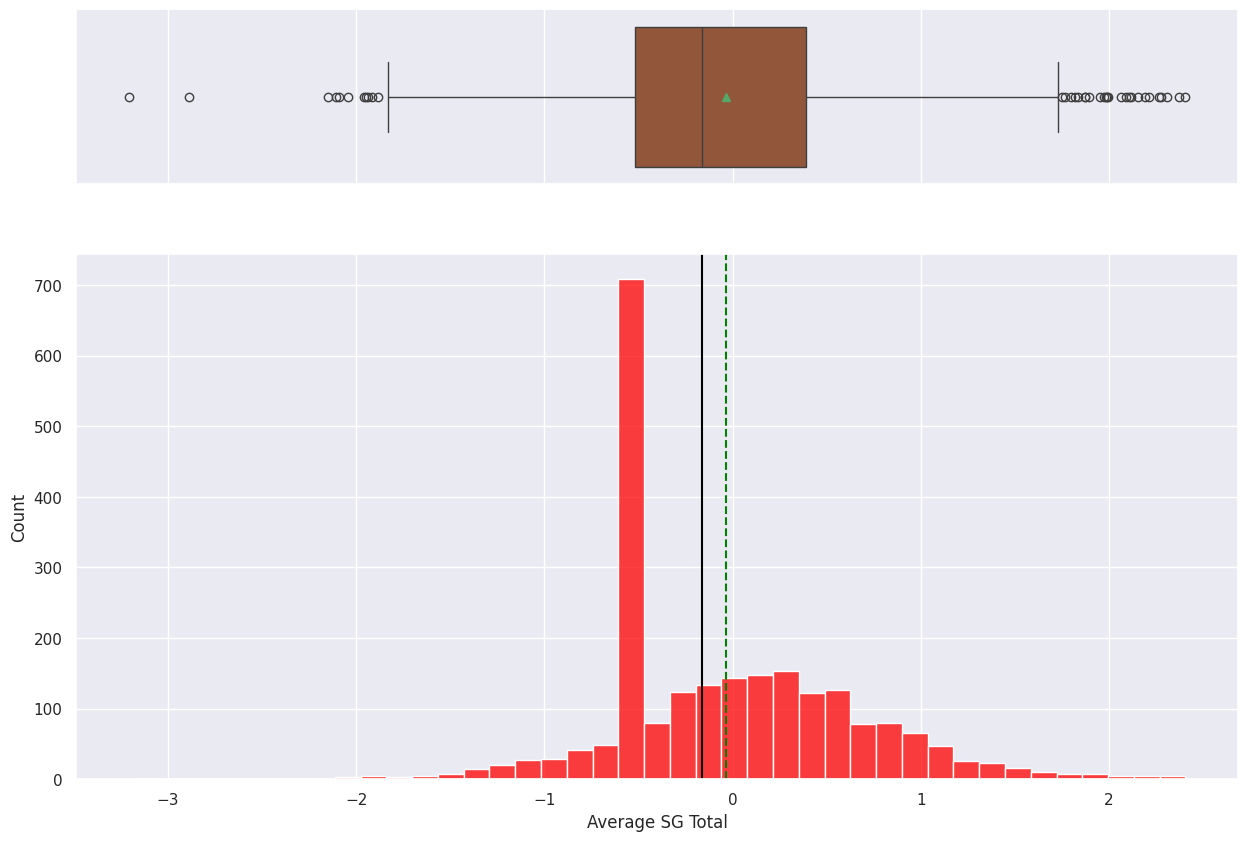

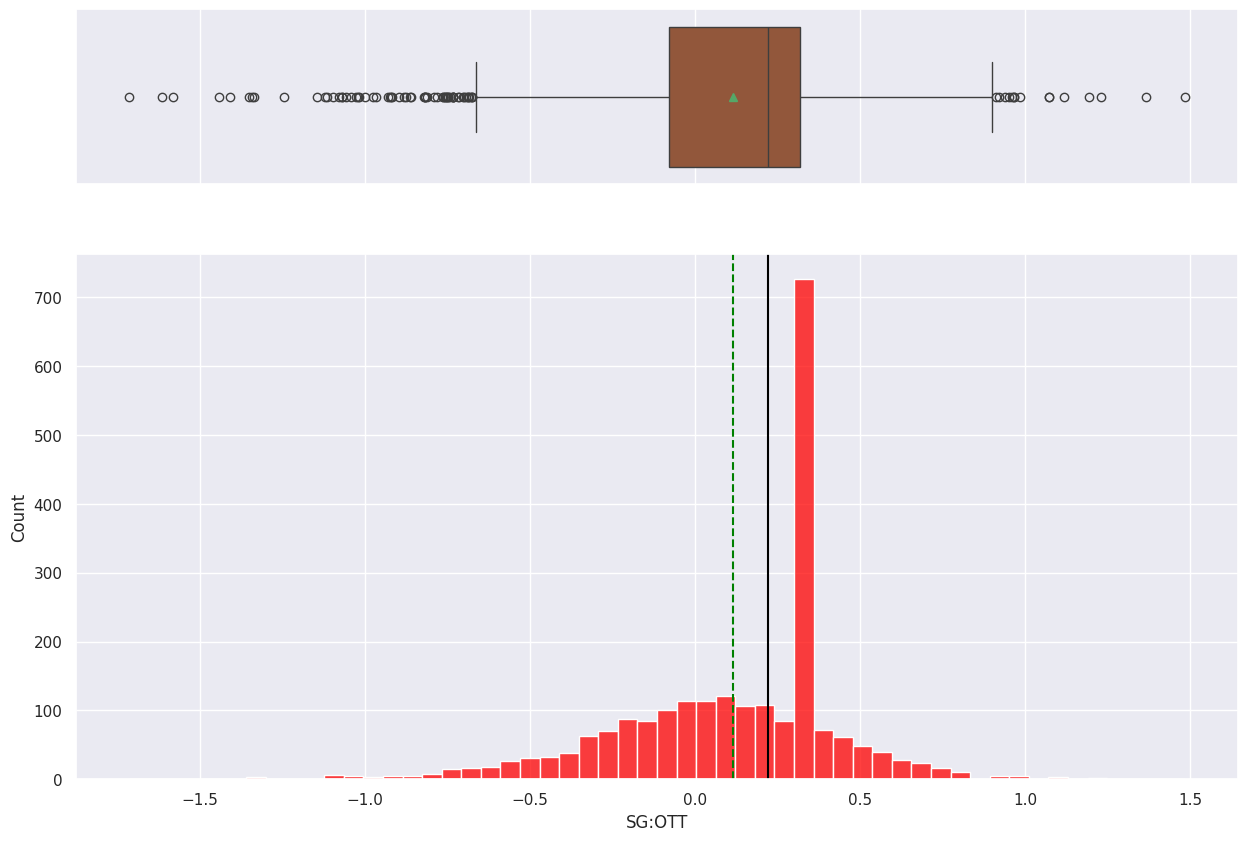

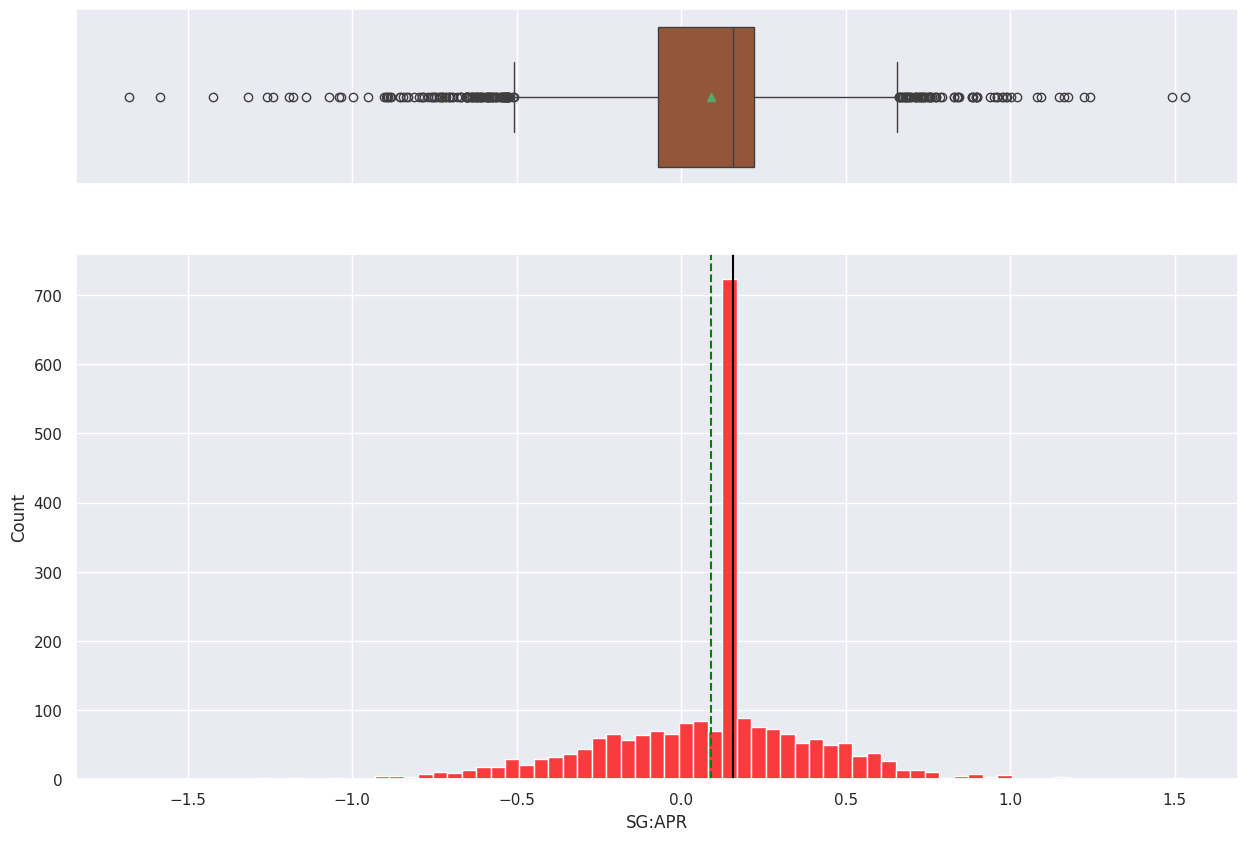

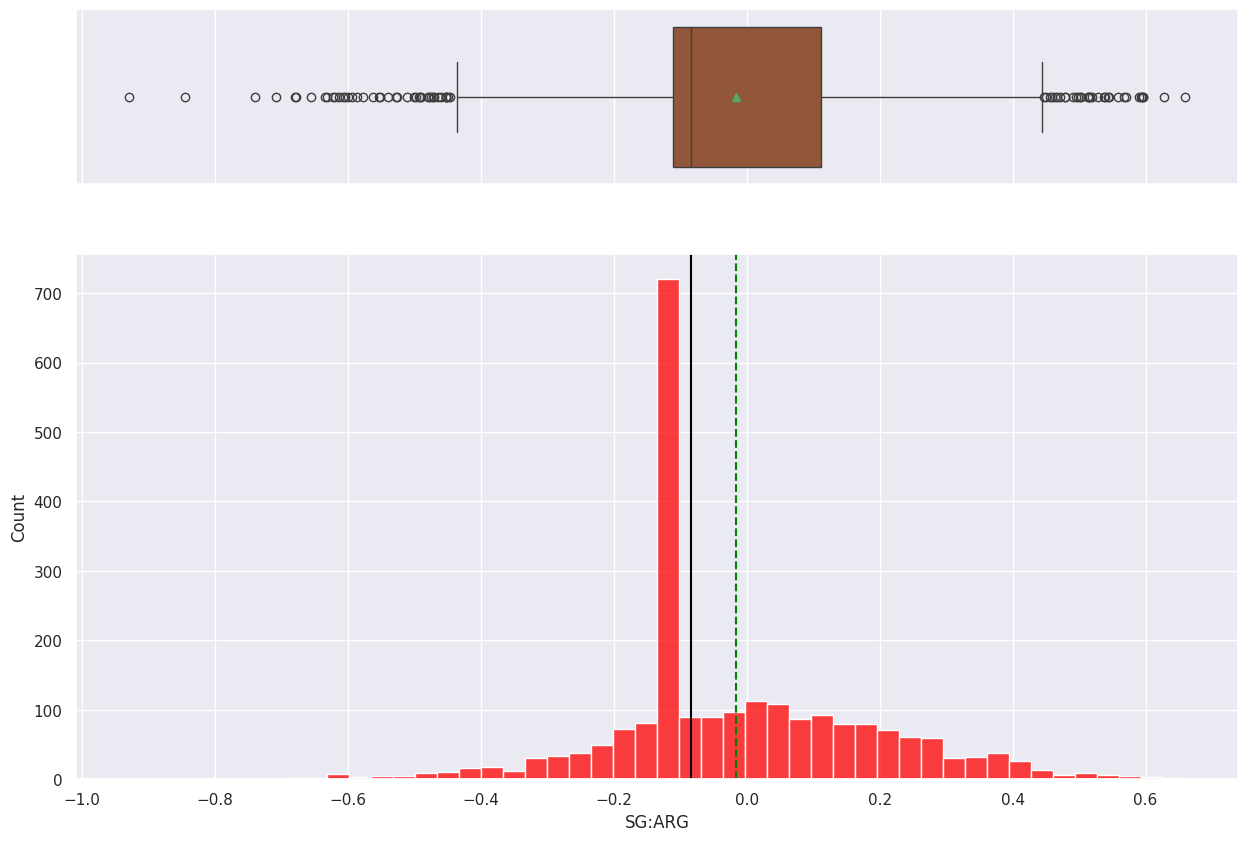

In [156]:
# prompt: plot a histogram boxplot for all numeric values

import numpy as np
# Assuming 'df' is your DataFrame as defined in the previous code.
for col in df.select_dtypes(include=np.number):
    histogram_boxplot(df, col)


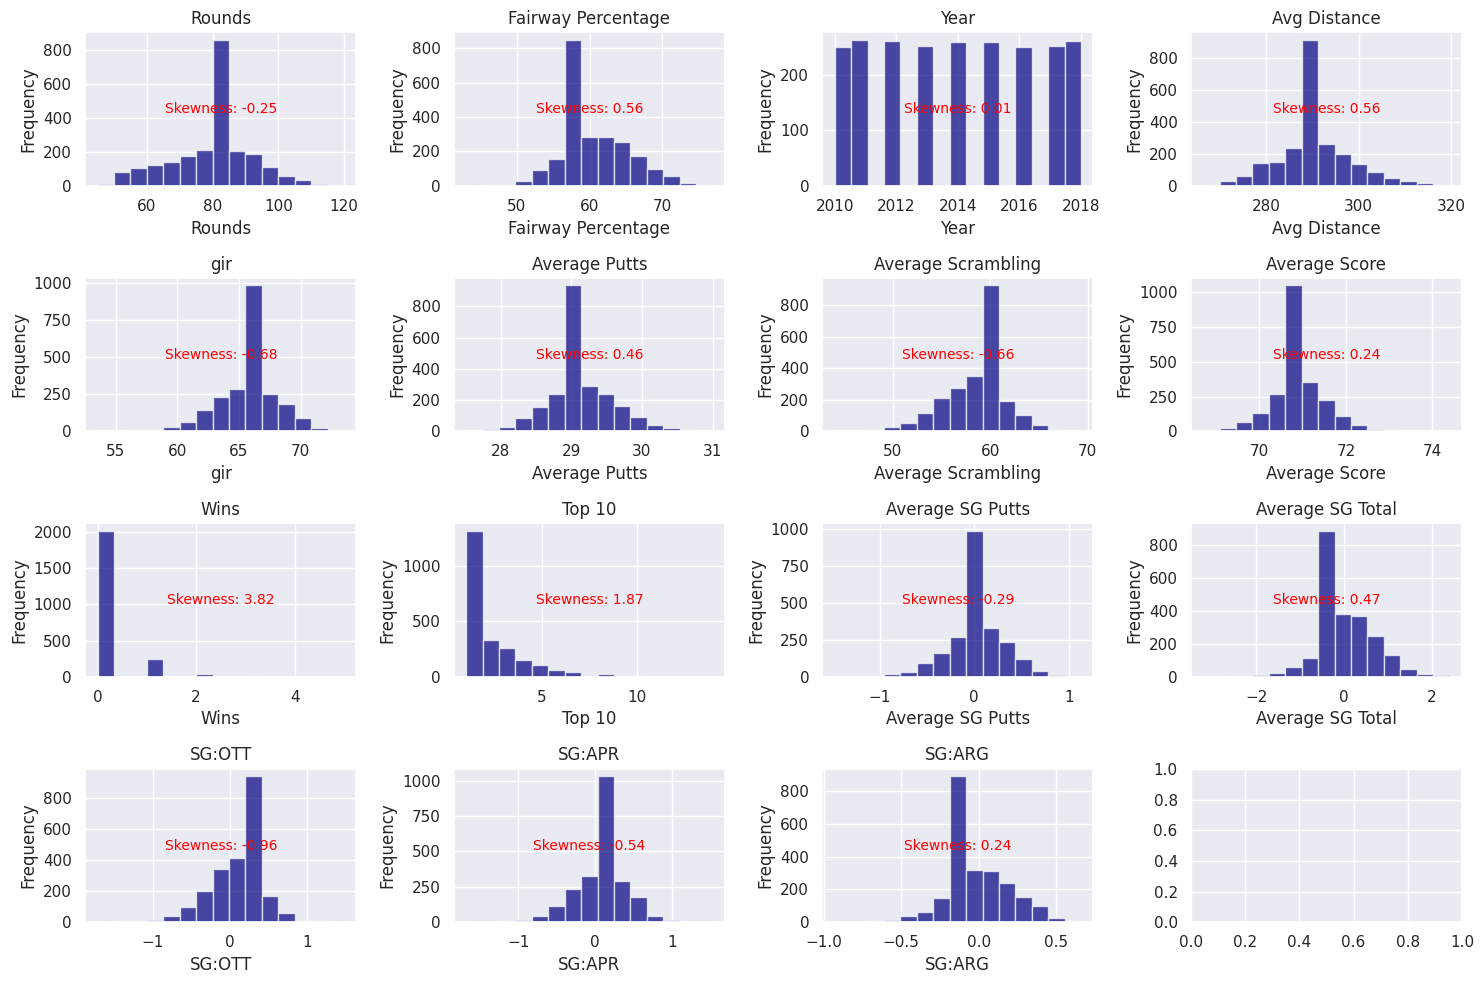

Skewness:
Rounds               -0.251352
Fairway Percentage    0.558231
Year                  0.010648
Avg Distance          0.555448
gir                  -0.683148
Average Putts         0.460900
Average Scrambling   -0.660032
Average Score         0.243882
Wins                  3.819336
Top 10                1.874686
Average SG Putts     -0.286180
Average SG Total      0.471061
SG:OTT               -0.955069
SG:APR               -0.542883
SG:ARG                0.235079
dtype: float64


In [157]:
# Calculate skewness for numerical columns
skewness = df.select_dtypes(include=['int64', 'float64']).skew()

# Count the number of numerical columns
num_cols_count = len(df.select_dtypes(include=['int64', 'float64']).columns)

# Determine the layout for subplots
num_rows = (num_cols_count + 3) // 4  # Adjust the number of columns in each row
num_cols = min(4, num_cols_count)  # Maximum of 4 columns in each row

# Plot histograms for numerical columns to visualize distributions and identify anomalies
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i in range(num_rows):
    for j in range(num_cols):
        col_idx = i * num_cols + j
        if col_idx < num_cols_count:
            col = df.select_dtypes(include=['int64', 'float64']).columns[col_idx]
            axes[i, j].hist(df[col], bins=15, color='navy', alpha=0.7)
            axes[i, j].set_title(f'{col}')
            axes[i, j].set_xlabel(col)
            axes[i, j].set_ylabel('Frequency')

            # Compute skewness
            skew_val = skewness[col]

            # Plot skewness value in the center of plot
            axes[i, j].text(0.5, 0.5, f'Skewness: {skew_val:.2f}', horizontalalignment='center',
                            verticalalignment='center', transform=axes[i, j].transAxes, fontsize=10, color='red')

plt.tight_layout()
plt.show()

# Print skewness values
print("Skewness:")
print(skewness)


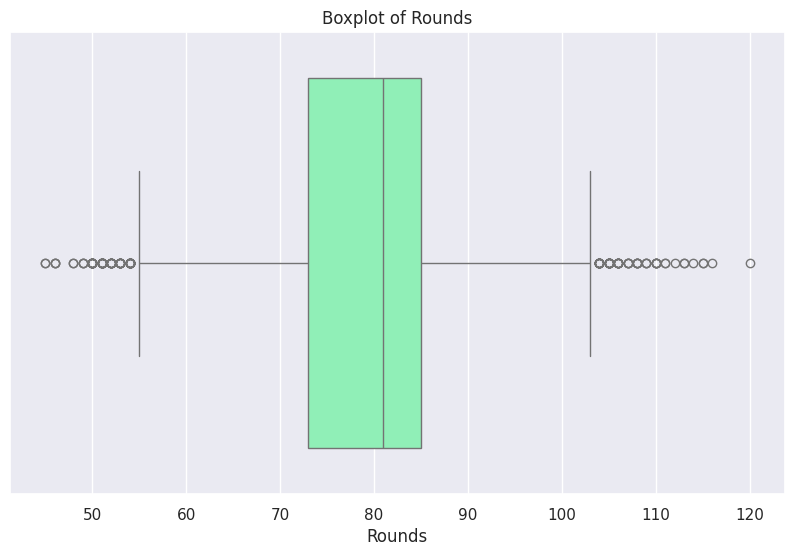

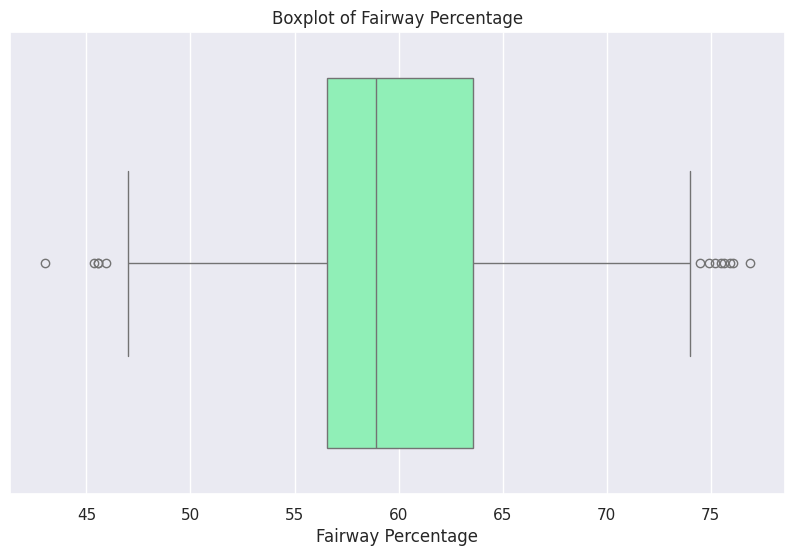

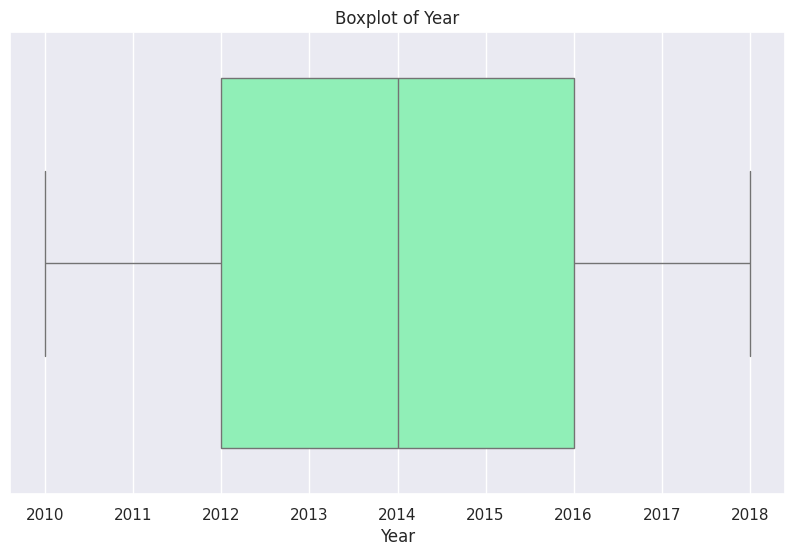

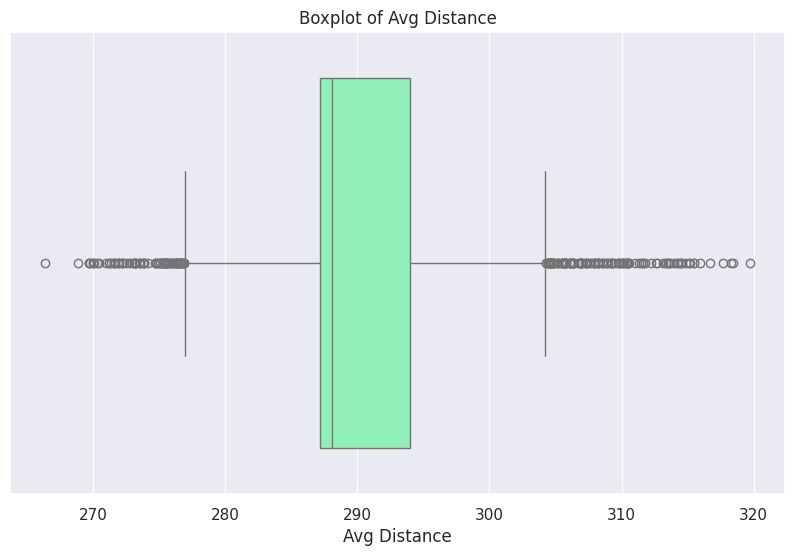

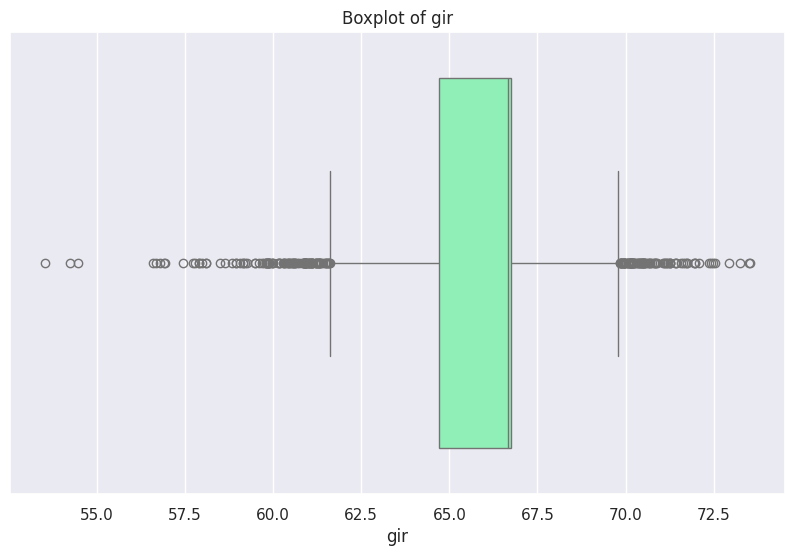

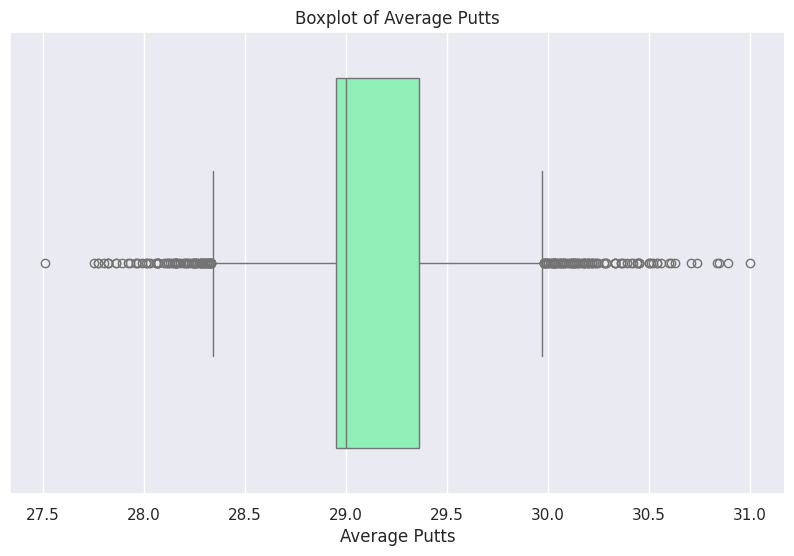

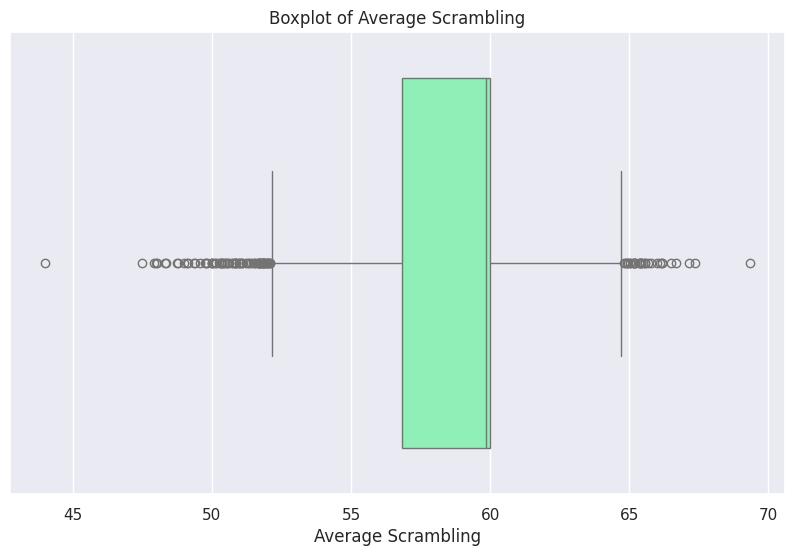

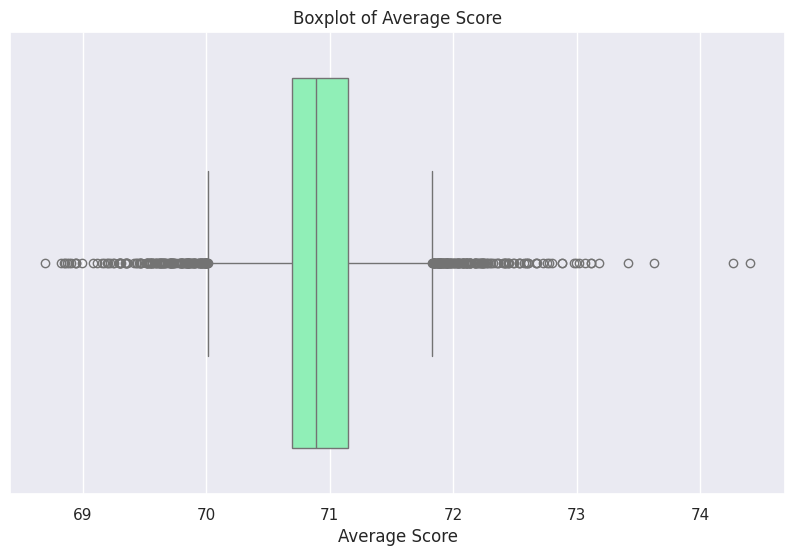

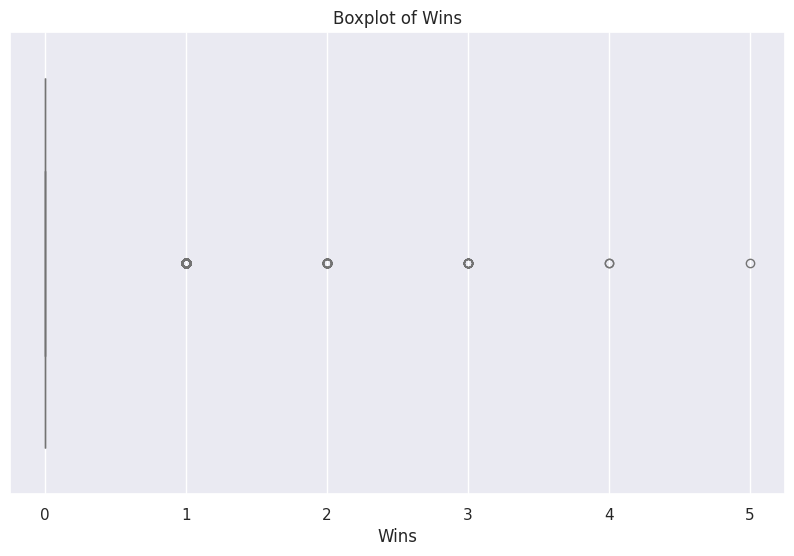

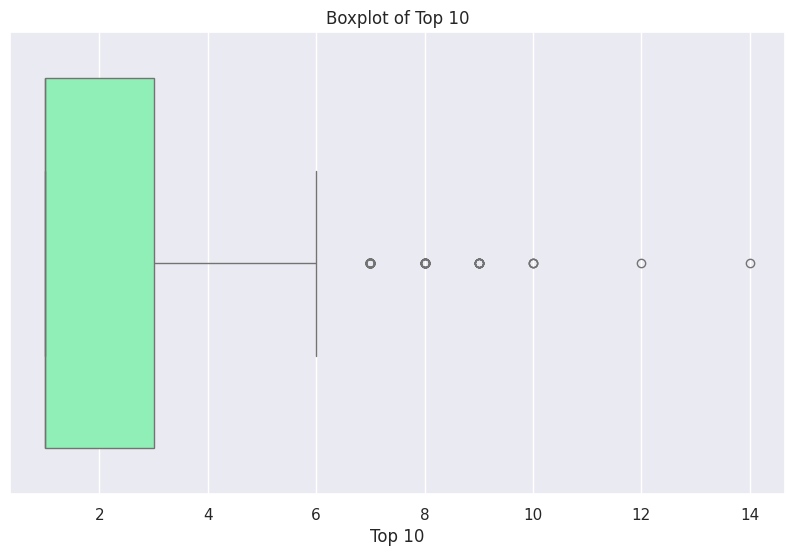

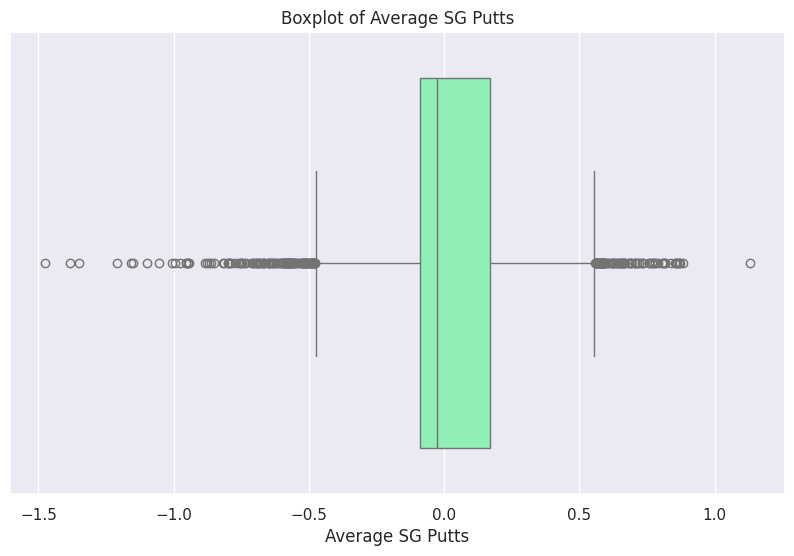

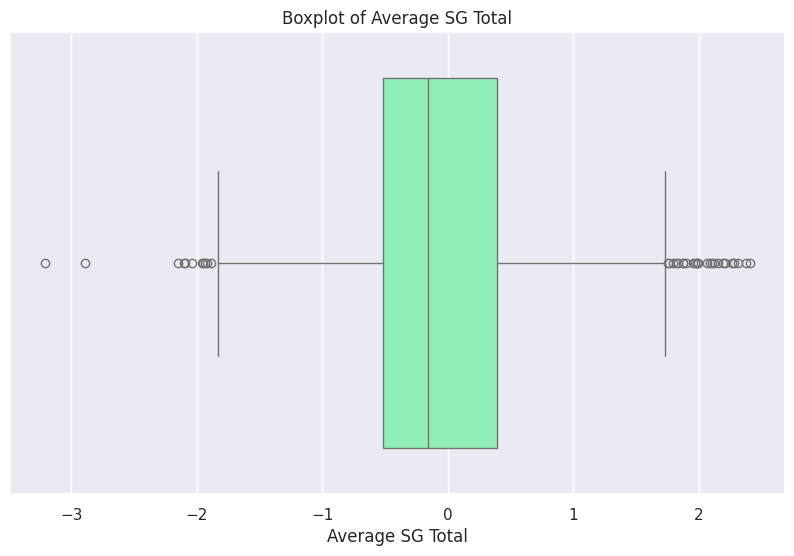

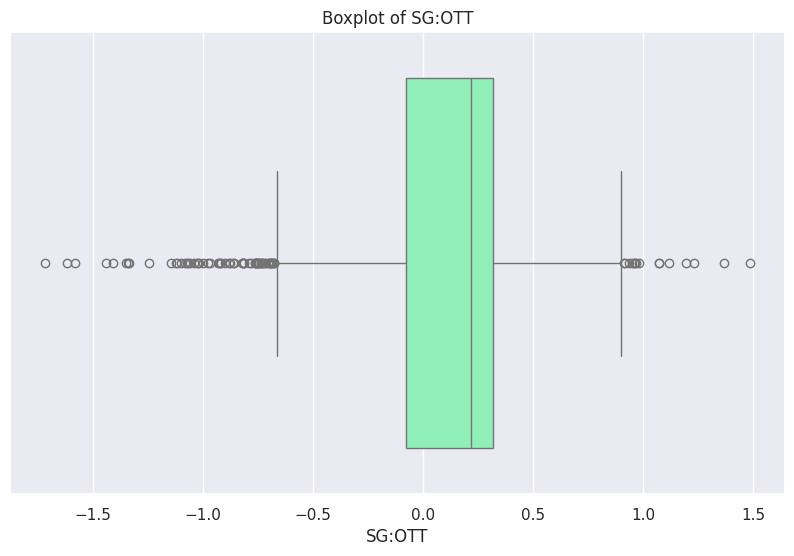

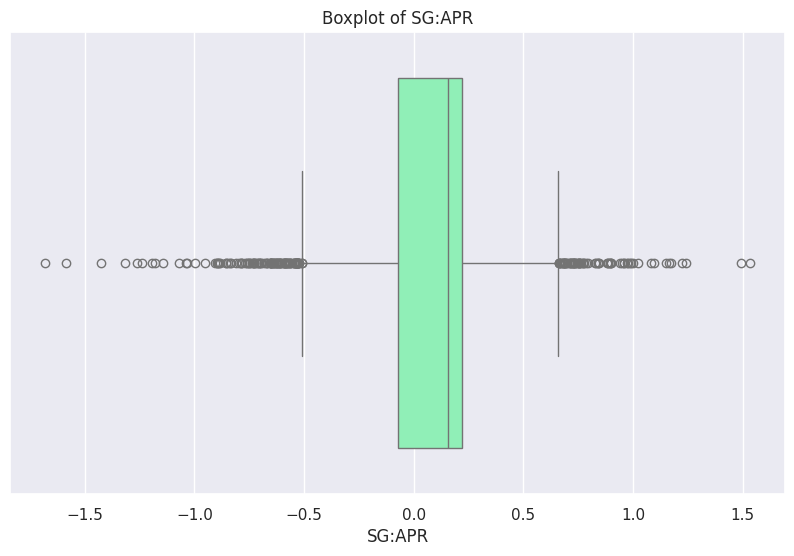

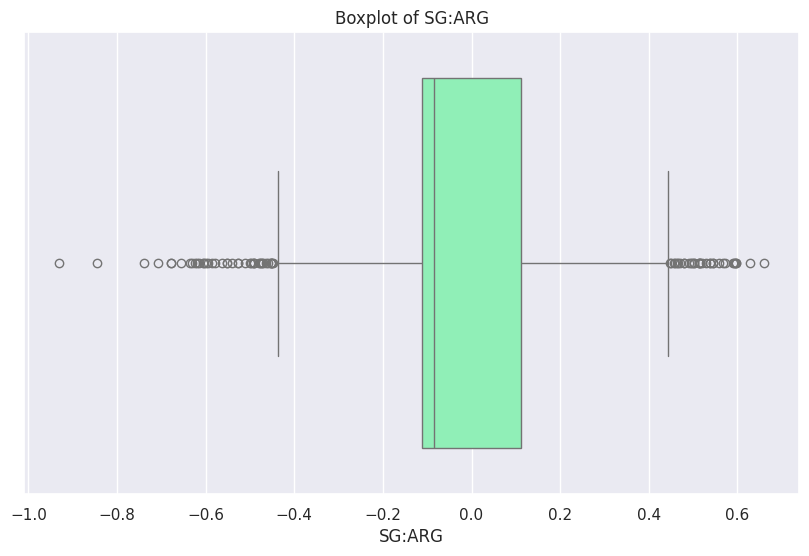

In [158]:
# Filter numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plotting boxplots for each numerical feature to identify outliers
for column in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column],palette='rainbow')
    plt.title(f'Boxplot of {column}')
    plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

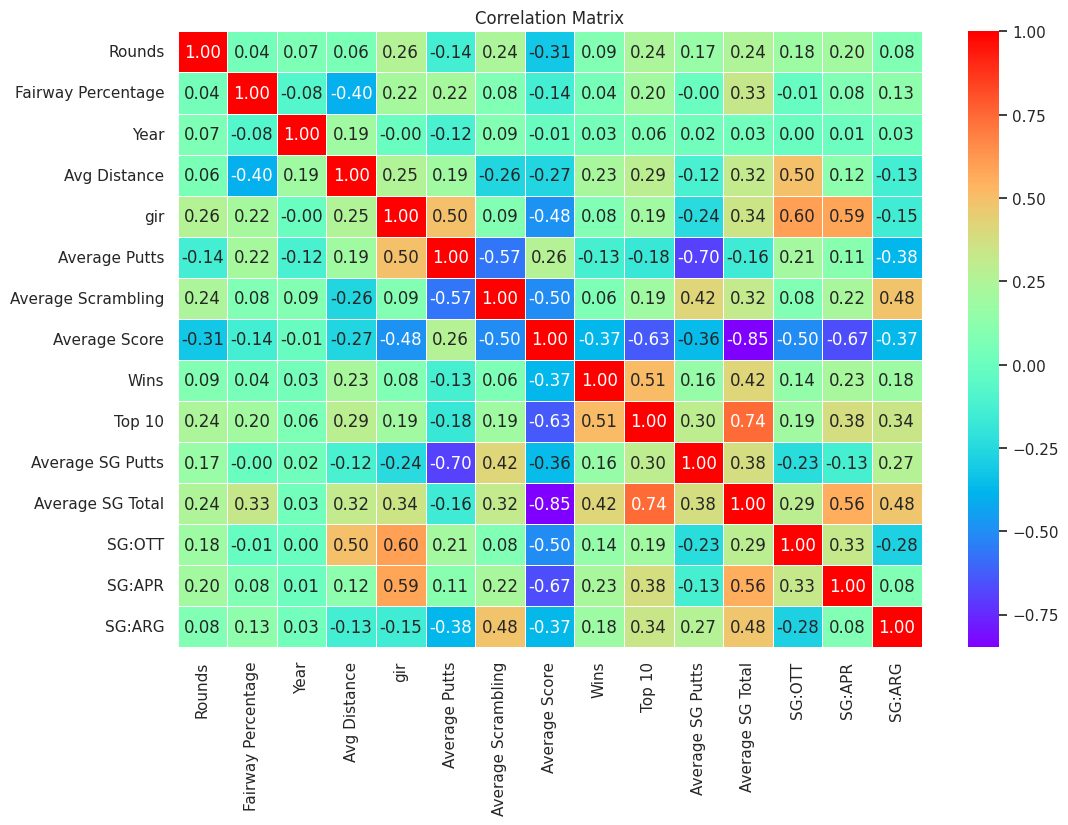

In [159]:
# Select only the numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')


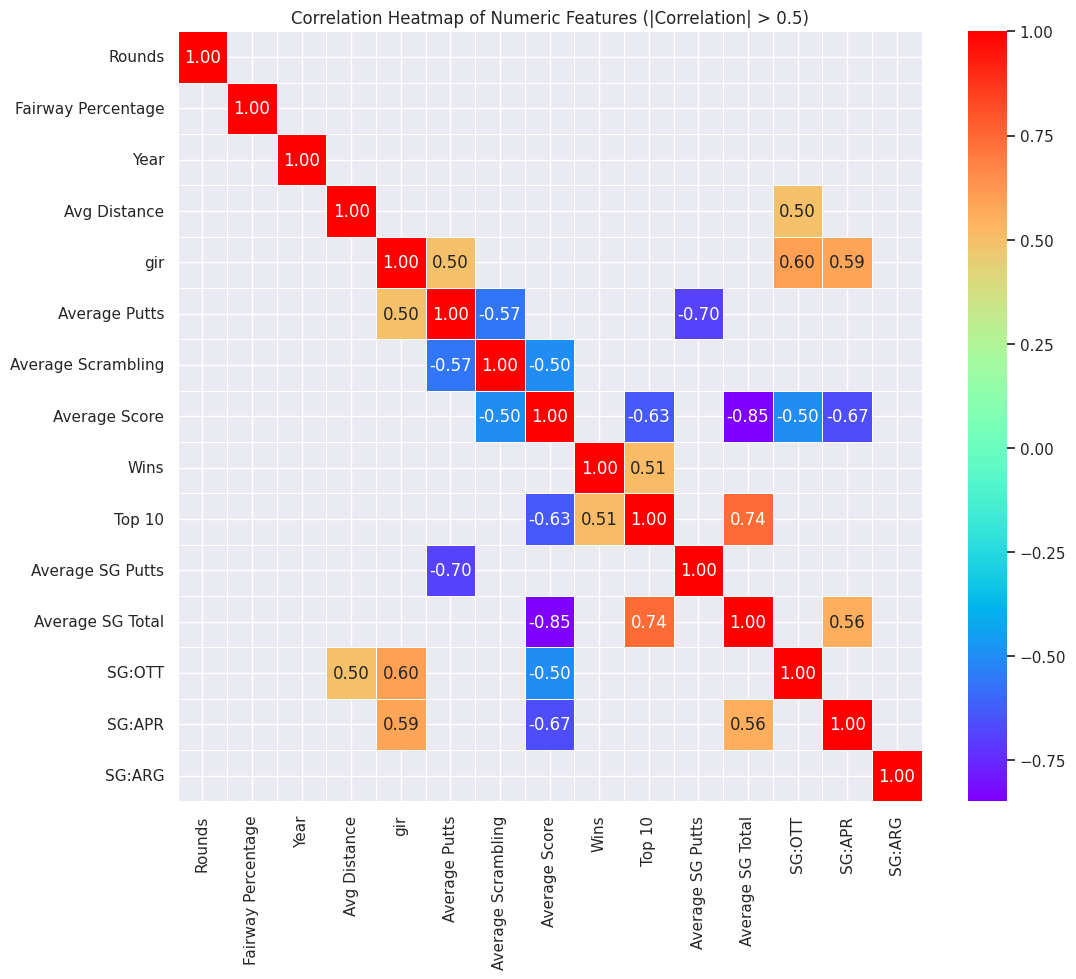

In [160]:
# Heatmap Plotting
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numeric_columns.corr()

# Filter correlation matrix to include values greater than 0.5 or less than -0.5
corr_matrix_filtered = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]

# Plot the heatmap with filtered correlation values
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_filtered, annot=True, cmap='rainbow', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features (|Correlation| > 0.5)')
plt.show()

In [161]:
# prompt: fill missing values with mean

# The code to fill missing values with the mean is already present in your provided code.
# It iterates through each numeric column in the DataFrame `df` and fills NaN values with the column's mean.
# For non-numeric columns, it fills NaN values with the column's mode.

# Here is that code again, for clarity:

for column in df.columns:
  if df[column].dtype == 'numeric':
    df[column].fillna(df[column].mean(),inplace=True)
  else:
    df[column].fillna(df[column].mode()[0],inplace=True)


In [162]:
df.drop(['Year'],axis=1,inplace=True)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rounds              2312 non-null   float64
 1   Fairway Percentage  2312 non-null   float64
 2   Avg Distance        2312 non-null   float64
 3   gir                 2312 non-null   float64
 4   Average Putts       2312 non-null   float64
 5   Average Scrambling  2312 non-null   float64
 6   Average Score       2312 non-null   float64
 7   Points              2312 non-null   object 
 8   Wins                2312 non-null   int64  
 9   Top 10              2312 non-null   float64
 10  Average SG Putts    2312 non-null   float64
 11  Average SG Total    2312 non-null   float64
 12  SG:OTT              2312 non-null   float64
 13  SG:APR              2312 non-null   float64
 14  SG:ARG              2312 non-null   float64
 15  Money               2312 non-null   object 
dtypes: flo

In [164]:
# prompt: convert points and money to float

import pandas as pd
# Assuming 'df' is your DataFrame as defined in the previous code.

# Convert 'Points' and 'Money' columns to numeric, coercing errors to NaN
df['Points'] = pd.to_numeric(df['Points'], errors='coerce')
df['Money'] = pd.to_numeric(df['Money'], errors='coerce')

# Fill NaN values in 'Points' and 'Money' with 0
df['Points'].fillna(0, inplace=True)
df['Money'].fillna(0, inplace=True)

# Now 'Points' and 'Money' columns are numeric and can be used in calculations.


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rounds              2312 non-null   float64
 1   Fairway Percentage  2312 non-null   float64
 2   Avg Distance        2312 non-null   float64
 3   gir                 2312 non-null   float64
 4   Average Putts       2312 non-null   float64
 5   Average Scrambling  2312 non-null   float64
 6   Average Score       2312 non-null   float64
 7   Points              2312 non-null   float64
 8   Wins                2312 non-null   int64  
 9   Top 10              2312 non-null   float64
 10  Average SG Putts    2312 non-null   float64
 11  Average SG Total    2312 non-null   float64
 12  SG:OTT              2312 non-null   float64
 13  SG:APR              2312 non-null   float64
 14  SG:ARG              2312 non-null   float64
 15  Money               2312 non-null   float64
dtypes: flo

In [166]:
df1 = df.copy()

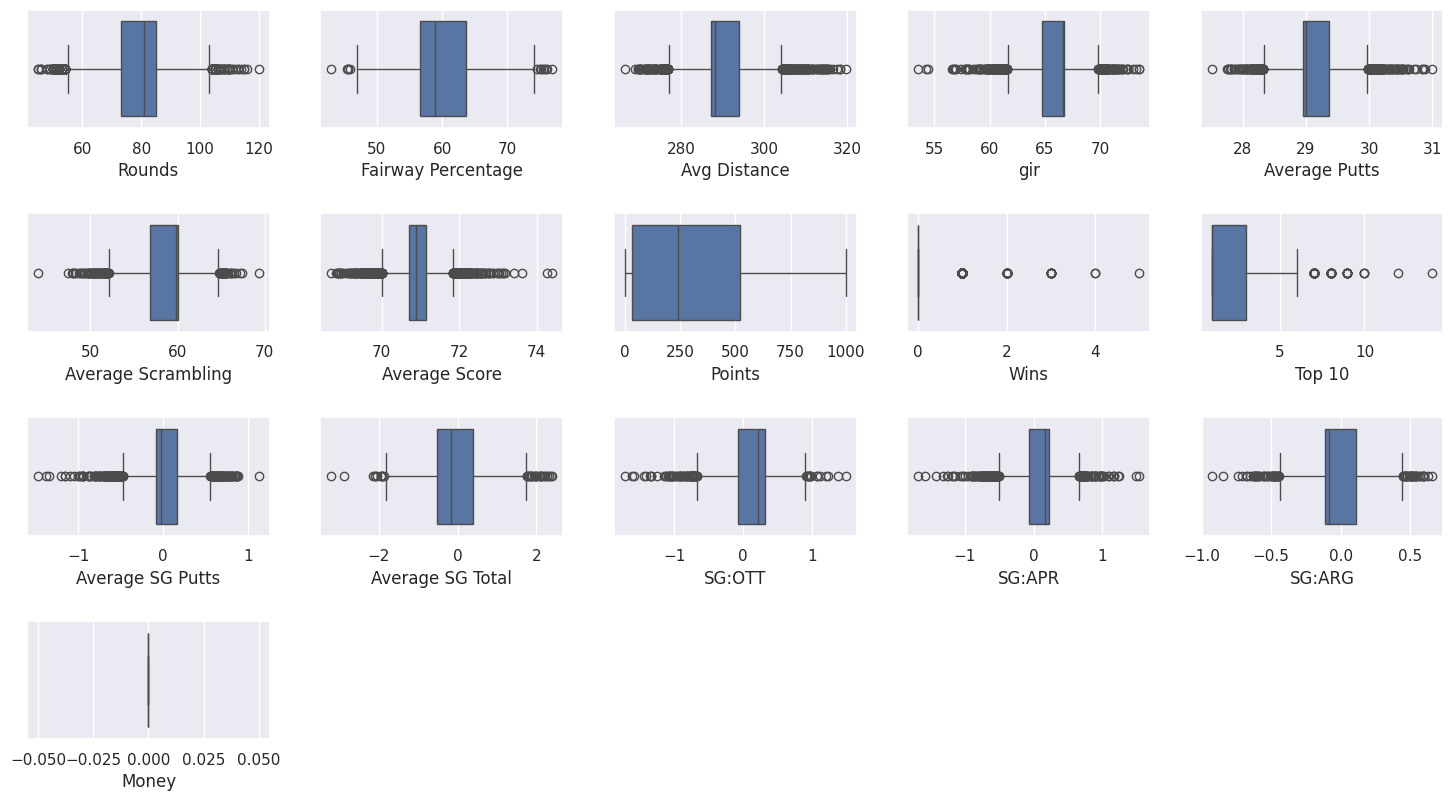

In [167]:
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

In [168]:
    # Function to remove outliers using the IQR method
def remove_outliers_iqr(df):
    # Select only numeric columns
     numeric_df = df1.select_dtypes(include=['int64', 'float64'])

    # Calculate the first quartile (Q1) and third quartile (Q3)
     Q1 = numeric_df.quantile(0.25)
     Q3 = numeric_df.quantile(0.75)

    # Interquartile range (IQR)
     IQR = Q3 - Q1

    # Define the lower and upper bounds for outlier detection
     lower_bound = Q1 - 1.5 * IQR
     upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
     outliers = ((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)

    # Count the number of outliers removed
     num_outliers_removed = outliers.sum()

    # Filter DataFrame based on rows without outliers
     df_no_outliers = df[~outliers]

     return df_no_outliers, num_outliers_removed

# Remove outliers using IQR method and get the number of outliers removed
df_no_outliers, num_outliers_removed = remove_outliers_iqr(df)

print("Number of outliers removed:", num_outliers_removed)

Number of outliers removed: 1021


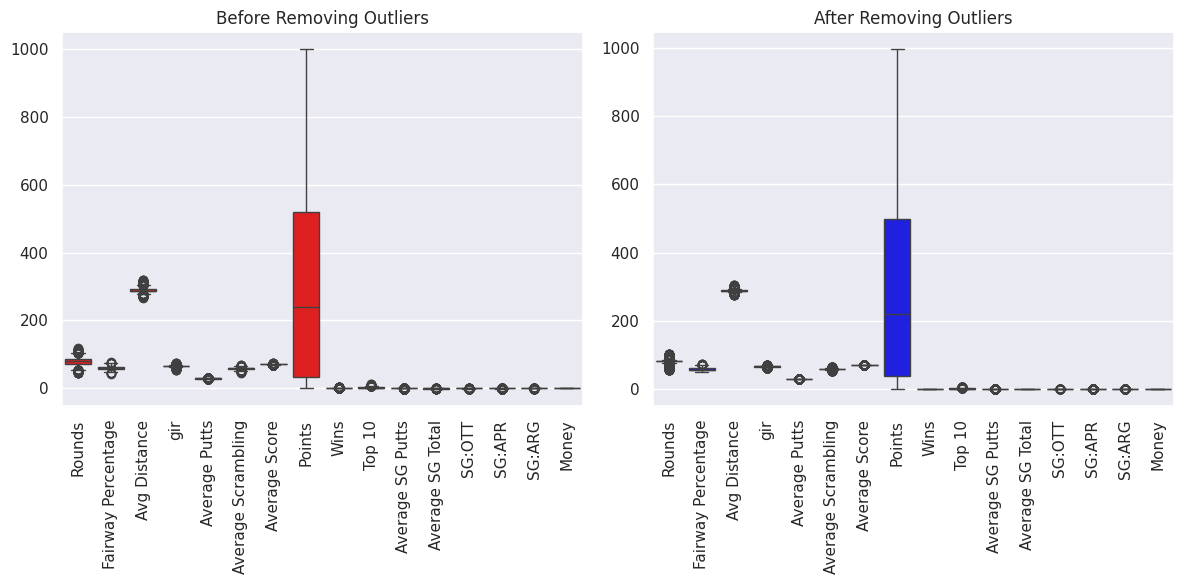

In [169]:
# prompt: use plot boxplot before after outliers fucntion with rotating the x axia to fit all categories

import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot boxplots before and after removing outliers
def plot_boxplots_before_after(df_before, df_after):
    # Set up the figure
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Boxplot before removing outliers (blue color)
    sns.boxplot(data=df_before, ax=axes[0], color='red')
    axes[0].set_title('Before Removing Outliers')
    axes[0].tick_params(axis='x', rotation=90) # Rotate x-axis labels

    # Boxplot after removing outliers (green color)
    sns.boxplot(data=df_after, ax=axes[1], color='blue')
    axes[1].set_title('After Removing Outliers')
    axes[1].tick_params(axis='x', rotation=90) # Rotate x-axis labels

    # Adjust layout
    plt.tight_layout()
    plt.show()
# Assuming df and df_no_outliers are defined as in your previous code
plot_boxplots_before_after(df1, df_no_outliers)


In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix

In [171]:
# prompt: make a list of all numeric columns called numcol

import numpy as np
numcol = df1.select_dtypes(include=np.number).columns.tolist()


In [173]:
X = df1.drop('Wins', axis=1)
y = df1['Wins']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

In [183]:
# prompt: build a linear regression mmodel that predicts the number of wins

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.005156041405257746
R-squared: 0.35083672511849107


In [184]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1618, 15) (1618,)
(694, 15) (694,)


In [185]:
def evaluate_model(true,predicted):
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [186]:
models = {
            "Linear Regression" : LinearRegression(),
            "Lasso" : Lasso(),
            "Ridge" : Ridge(),
            "k-Neighbors Regression" : KNeighborsRegressor(),
            "Decision Tree" : DecisionTreeRegressor(),
            "Random Forest Regressor" : RandomForestRegressor(n_estimators = 100, random_state = 0),
            "AdaBoost Regressor" :AdaBoostRegressor(),
            "XGBRegressor" : XGBRegressor()
        }

In [187]:
score_text=""
for i in range(len(models)):
            model = list(models.values())[i]
            model.fit(x_train,y_train)

            #Make prediction:
            y_train_pred = model.predict(x_train)
            y_test_pred = model.predict(x_test)

            #Evaluate Train and Test dataset :

            model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
            model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
            model_name = list(models.keys())[i]

            print(model_name)
            print("="*40)
            print("Model Performance for Training set :")

            print('Root Mean Squared Error :',model_train_rmse)
            print("Mean Absolute Error : ", model_train_mae)
            print("R2 Score : ", model_train_r2)

            print("="*40)

            print("Model Performance for Testing set :")

            print('Root Mean Squared Error : ', model_test_rmse)
            print('Mean Absolute Error :  ',{model_test_mae})
            print('R2 Score : ', {model_test_r2})
            print()

Linear Regression
Model Performance for Training set :
Root Mean Squared Error : 0.07469906184713834
Mean Absolute Error :  0.04027460126293815
R2 Score :  0.3314261218592607
Model Performance for Testing set :
Root Mean Squared Error :  0.07180558059968421
Mean Absolute Error :   {0.0369996984828287}
R2 Score :  {0.35083672511849107}

Lasso
Model Performance for Training set :
Root Mean Squared Error : 0.09135670880020871
Mean Absolute Error :  0.05660515736896871
R2 Score :  0.0
Model Performance for Testing set :
Root Mean Squared Error :  0.08933967321432515
Mean Absolute Error :   {0.05237832311566919}
R2 Score :  {-0.004907911543766019}

Ridge
Model Performance for Training set :
Root Mean Squared Error : 0.07482532507140038
Mean Absolute Error :  0.040655377283072454
R2 Score :  0.32916404157301105
Model Performance for Testing set :
Root Mean Squared Error :  0.07164823652879608
Mean Absolute Error :   {0.03712541861097247}
R2 Score :  {0.3536785678305129}

k-Neighbors Regressi

In [189]:
# prompt: take the mostwith lowest RMSE and make predictions on wins

# Assuming 'models' dictionary and 'x_test' are defined as in the previous code.

# Find the model with the lowest RMSE on the test set
best_model = None
lowest_rmse = float('inf')
for model_name, model in models.items():
    y_test_pred = model.predict(x_test)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    if model_test_rmse < lowest_rmse:
        lowest_rmse = model_test_rmse
        best_model = model
        best_model_name = model_name

print(f"The best model is: {best_model_name} with RMSE: {lowest_rmse}")

# Make predictions on wins using the best model
y_pred_wins = best_model.predict(x_test)



The best model is: Random Forest Regressor with RMSE: 0.05814257543151831


In [190]:
# prompt: predict the number of wins using the random forest rgressor over a 3 year period

from sklearn.ensemble import RandomForestRegressor

# Assuming x_train, y_train, x_test are defined as in your previous code.

# Initialize and train the RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
rf_regressor.fit(x_train, y_train)

# Predict wins for the next 3 years (assuming x_test represents the next 3 years of data)
predicted_wins_3_years = rf_regressor.predict(x_test)

print("Predicted Wins for the next 3 years:")
predicted_wins_3_years


Predicted Wins for the next 3 years:


array([0.054, 0.024, 0.   , 0.002, 0.004, 0.148, 0.   , 0.   , 0.   ,
       0.   , 0.004, 0.   , 0.204, 0.   , 0.   , 0.004, 0.026, 0.012,
       0.   , 0.002, 0.   , 0.14 , 0.   , 0.004, 0.258, 0.   , 0.016,
       0.04 , 0.   , 0.   , 0.   , 0.01 , 0.   , 0.   , 0.   , 0.   ,
       0.106, 0.088, 0.012, 0.006, 0.   , 0.   , 0.   , 0.016, 0.   ,
       0.   , 0.   , 0.002, 0.01 , 0.   , 0.   , 0.04 , 0.   , 0.   ,
       0.422, 0.   , 0.   , 0.   , 0.272, 0.09 , 0.   , 0.138, 0.   ,
       0.   , 0.   , 0.   , 0.356, 0.   , 0.   , 0.002, 0.   , 0.   ,
       0.09 , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.008, 0.   ,
       0.002, 0.172, 0.152, 0.   , 0.   , 0.   , 0.008, 0.   , 0.   ,
       0.06 , 0.   , 0.   , 0.138, 0.004, 0.   , 0.   , 0.   , 0.214,
       0.   , 0.   , 0.   , 0.008, 0.   , 0.038, 0.   , 0.   , 0.014,
       0.   , 0.   , 0.22 , 0.038, 0.   , 0.   , 0.   , 0.   , 0.064,
       0.   , 0.006, 0.232, 0.   , 0.   , 0.   , 0.006, 0.002, 0.   ,
       0.   , 0.   ,

In [191]:
# prompt: sum the array to whole number to find number of wins over three year period

import numpy as np
# Calculate the sum of predicted wins over the three-year period
total_predicted_wins = np.sum(predicted_wins_3_years)

print(f"Total predicted wins over three years: {total_predicted_wins}")


Total predicted wins over three years: 22.533999999999985
